# MSDS 422 Assignment 2 - Evaluating Regression Models:

Compete in the House Prices:  Advanced Regression Techniques competition here:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques.  You must establish an account with Kaggle.com (free). 

Use many explanatory variables for your predictions. Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. Evaluate these methods within a cross-validation design using the root mean-squared error (RMSE) as an index of prediction error.  Submit your models to Kaggle.com for evaluation on the test set.  Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.

Regarding the management problem, imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

#### Programming Resources
A detailed example shows how to evaluate alternative regressors within a cross-validation design:  That is example is entitled "Regression Examples: Predicting Sales" under Technology Resources.

#### Grading Guidelines (50 points)
- Data preparation, exploration, visualization (10 points)
- Review research design and modeling methods (10 points)
- Review results, evaluate models (10 points)
- Implementation and programming  as evidenced by Kaggle submission (10 points)
- Exposition, problem description, and management recommendations (10 points)

### Table of Contents
- Data preparation, exploration, visualization (10 points)
- Review research design and modeling methods (10 points)
- Review results, evaluate models (10 points)
- Implementation and programming  as evidenced by Kaggle submission (10 points)
- Kaggle Results
- Exposition, problem description, and management recommendations (10 points)

## Data preparation, exploration, visualization (10 points)

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import sklearn
import math
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from scipy.stats import skew 
from scipy import stats 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from datetime import datetime
import timeit
from sklearn.decomposition import PCA
import warnings


from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNetCV, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from IPython.display import display
from IPython.display import HTML

def clear_plot():
    plt.cla()   # Clear axis
    plt.clf()   # Clear figure
    plt.close() # Close a figure window
    
sns.set()
warnings.simplefilter('ignore')

/Users/christopherfesta/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### We don't need the Id column so drop it

In [8]:
train = train.drop(['Id'], axis=1)

#### First let's look at the distribution of the variable we are trying to predict

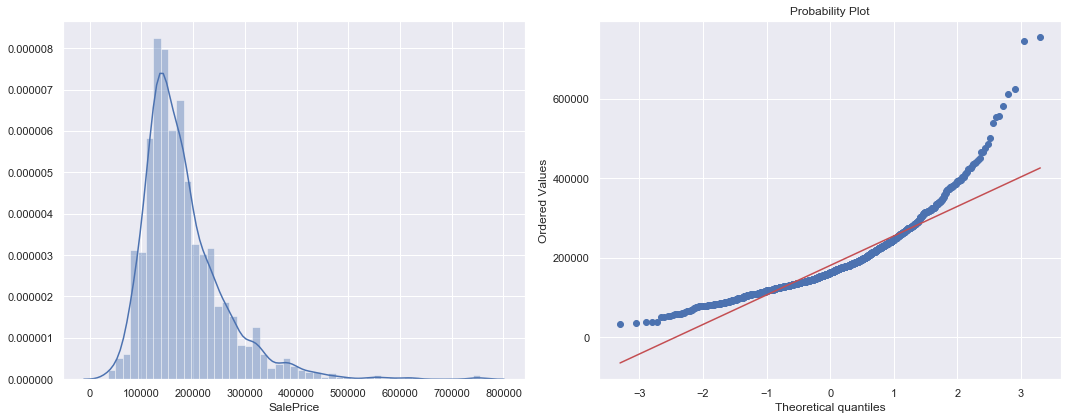

In [9]:
fig, axarr = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
sns.distplot(train.SalePrice, ax=axarr[0])
axarr[0] = stats.probplot(train.SalePrice, plot=sns.mpl.pyplot)
fig.tight_layout()
plt.show()

Kurtosis and skewness should be close to zero, let's see how we are doing

In [10]:
print('Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(train.SalePrice)))
print('Skewness of normal distribution (should be 0): {}'.format(stats.skew(train.SalePrice)))

Kurtosis of normal distribution (should be 0): 6.509812011089439
Skewness of normal distribution (should be 0): 1.880940746034036


The SalePrice variable we are trying to predict is skewed to the right. Also the kurtosis and skewness is not close to zero. We want to make SalePrice normally distributed so let's apply a log transformation using numpy log1p

https://numpy.org/doc/stable/reference/generated/numpy.log1p.html

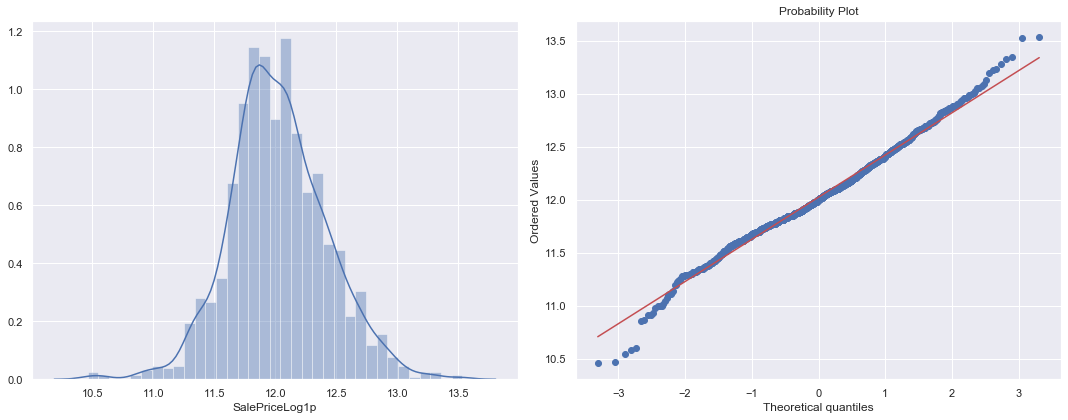

In [11]:
# create a new column SalePriceLog1p to store the log transformation
train['SalePriceLog1p'] = np.log1p(train.SalePrice)
fig, axarr = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
sns.distplot(train.SalePriceLog1p, ax=axarr[0])
axarr[0] = stats.probplot(train.SalePriceLog1p, plot=sns.mpl.pyplot)
fig.tight_layout()
plt.show()

Look at kurtosis and skewness after the log1p transformation

In [12]:
print('Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(train.SalePriceLog1p)))
print('Skewness of normal distribution (should be 0): {}'.format(stats.skew(train.SalePriceLog1p)))

Kurtosis of normal distribution (should be 0): 0.8026427107468055
Skewness of normal distribution (should be 0): 0.12122191311528359


The SalePrice looks normally distributed and the excess kurtosis and skewness has improved. Now and it is ready to use in our model

#### Check for outliers

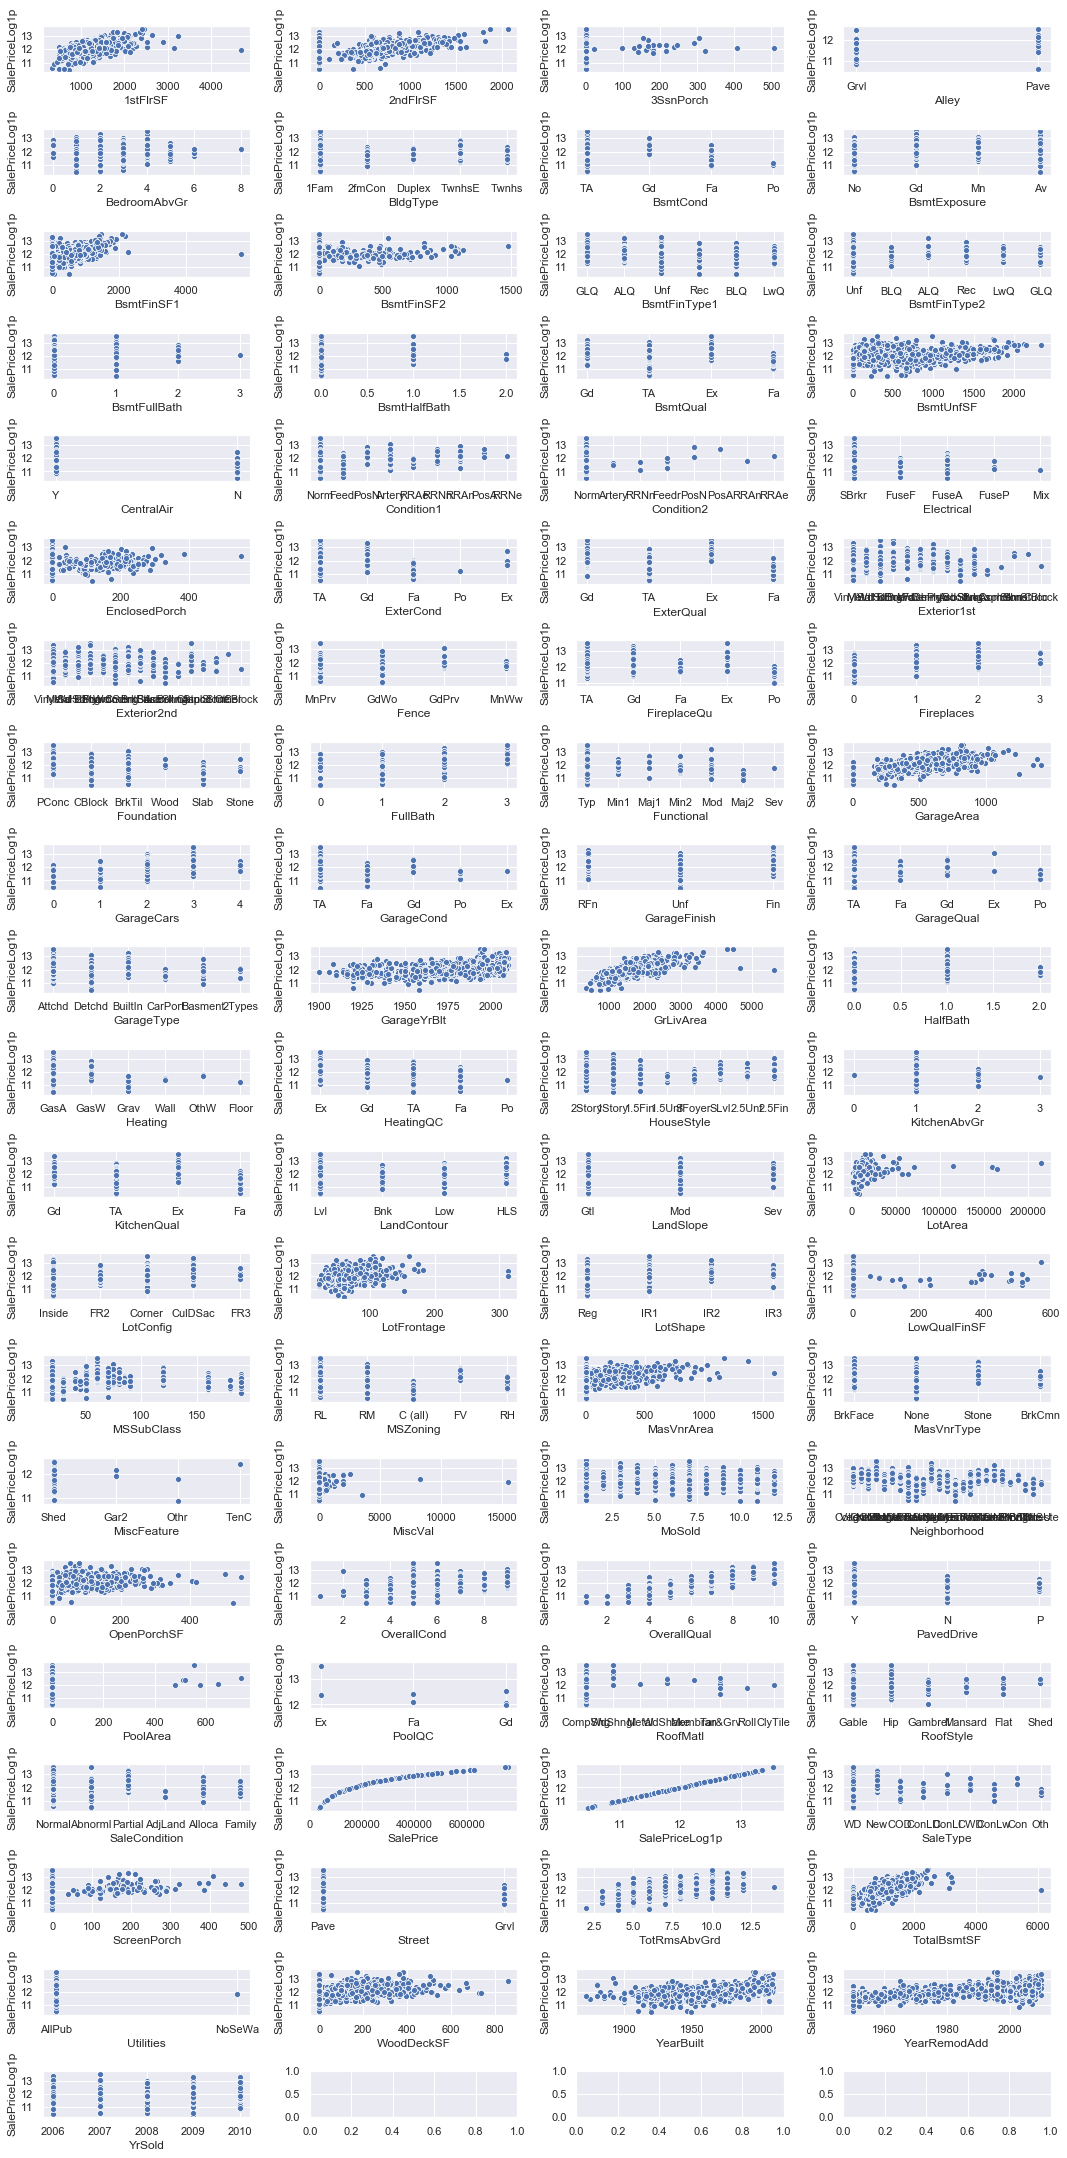

In [13]:
n_cols = 4
n_rows = math.ceil(train.shape[1] / n_cols)
fig, axarr = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(15,30))

i = 0; j = 0;
for column in train.columns.sort_values():
    sns.scatterplot(x=column, y='SalePriceLog1p', data=train, ax=axarr[i, j])
    if j >= n_cols-1:
        i = i + 1
        j = 0
    else:
        j = j + 1
        
fig.tight_layout()
plt.show()

#### Remove the outliers

In [14]:
# remove the outliers
train = train.drop(train[train.GrLivArea > 4500].index)
train = train.drop(train[train['1stFlrSF'] > 3000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 4000].index)

# I tried these below but removing them made the model performance worse
#train = train.drop(train[train['BsmtFinSF2'] > 1400].index)
#train = train.drop(train[train['EnclosedPorch'] > 400].index)
#train = train.drop(train[train['GarageArea'] > 1220].index)
#train = train.drop(train[train['LotArea'] > 55000].index)
#train = train.drop(train[train['LotFrontage'] > 200].index)
#train = train.drop(train[train['TotRmsAbvGrd'] > 12.5].index)

train.shape

(1457, 81)

#### Look at the scatter plots after removing outliers

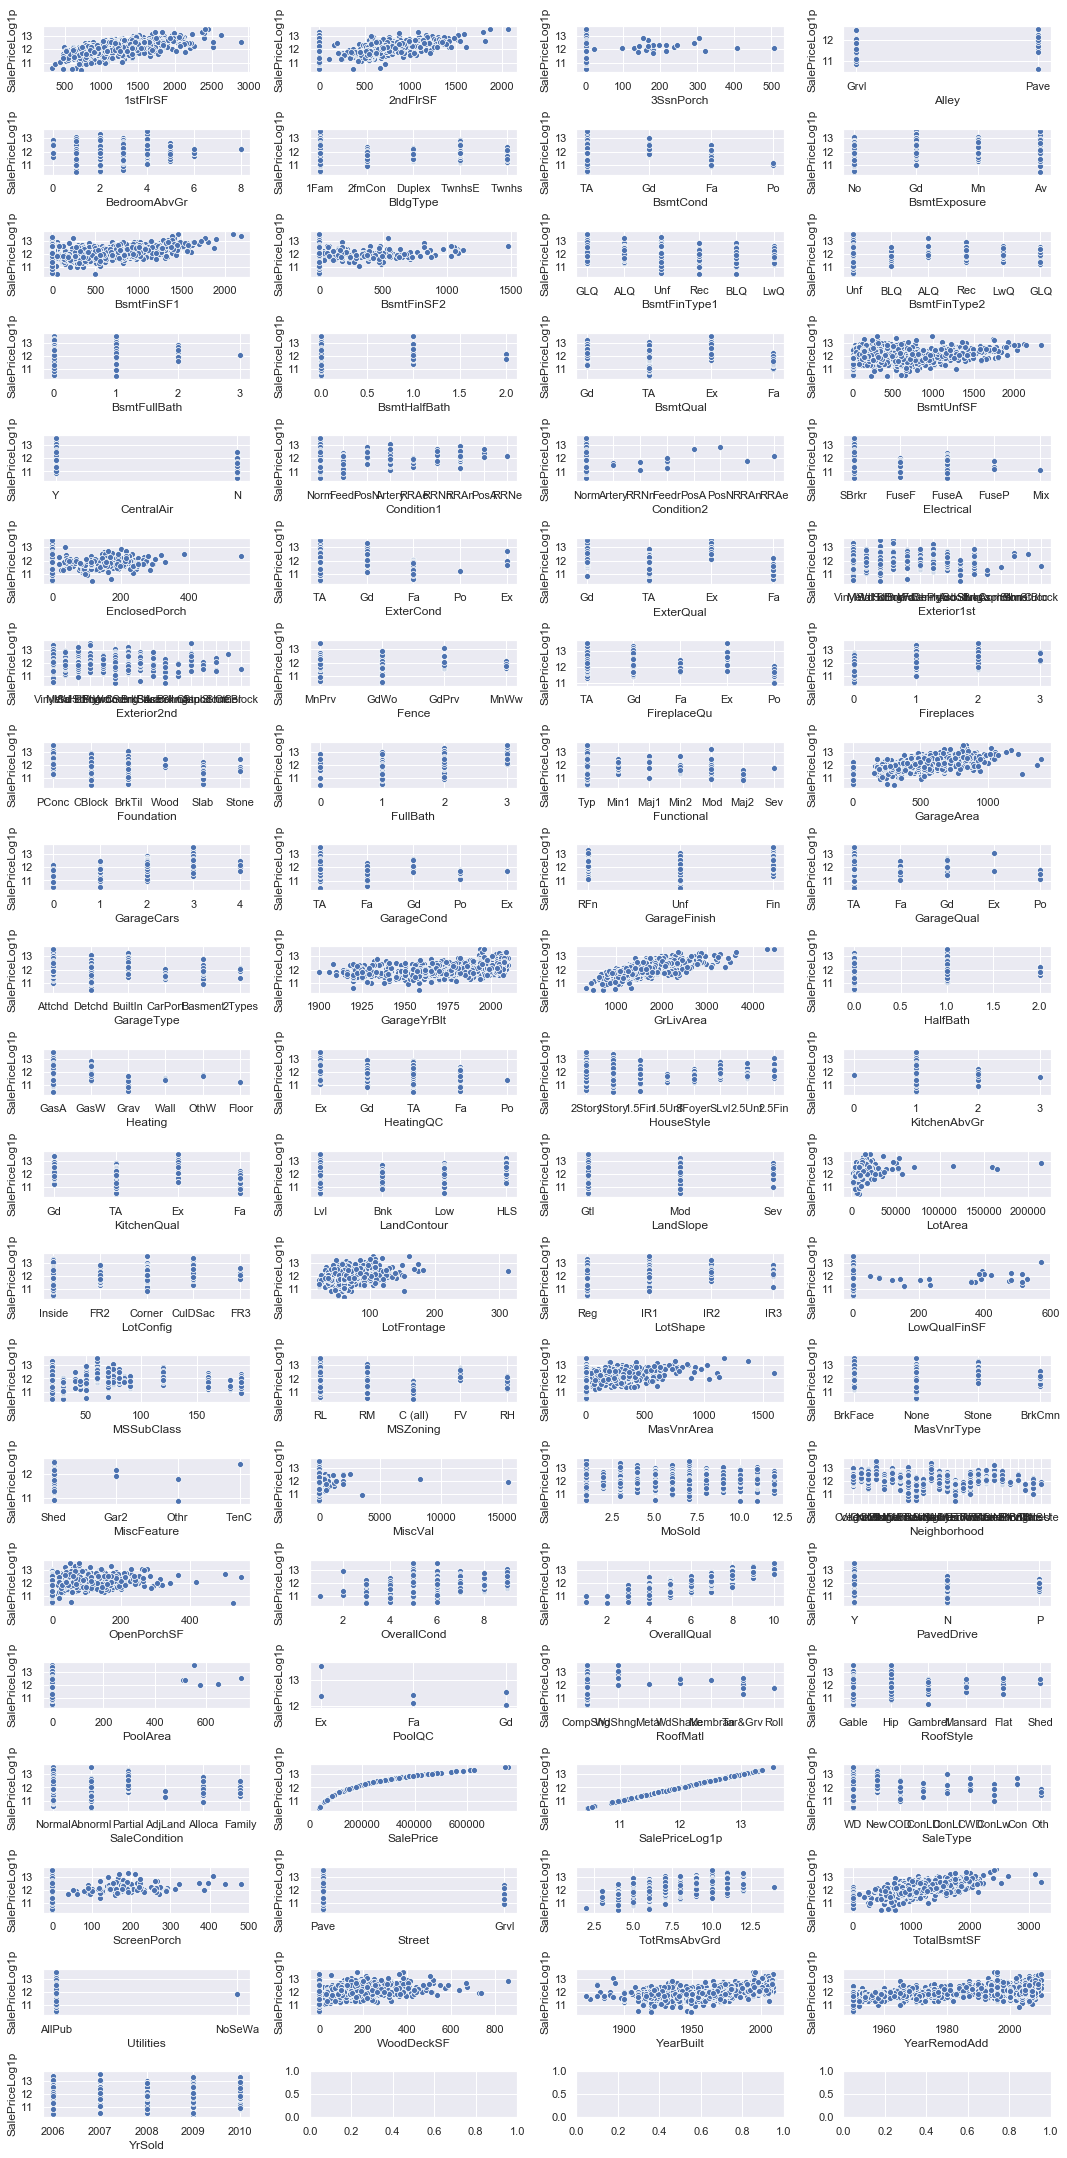

In [15]:
n_cols = 4
n_rows = math.ceil(train.shape[1] / n_cols)
fig, axarr = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(15,30))

i = 0; j = 0;
for column in train.columns.sort_values():
    sns.scatterplot(x=column, y='SalePriceLog1p', data=train, ax=axarr[i, j])
    if j >= n_cols-1:
        i = i + 1
        j = 0
    else:
        j = j + 1
        
fig.tight_layout()
plt.show()

#### Cleanup data

Let's inspect missing values

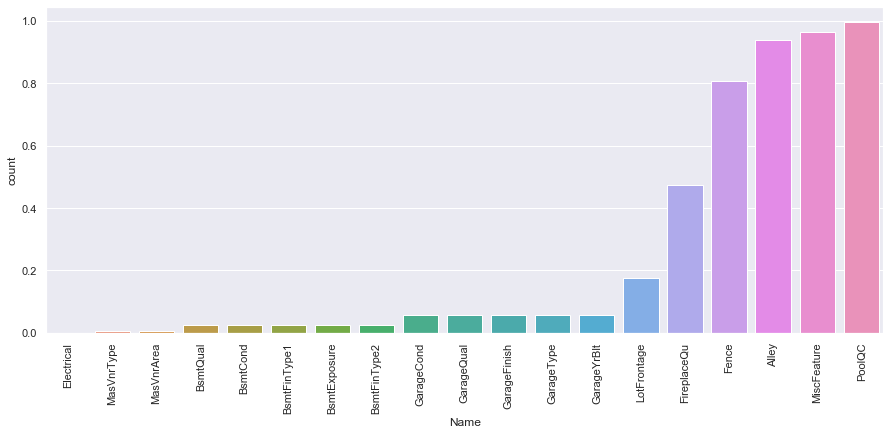

In [16]:
# let's get the attributes between the train and test data so we are looking at the combined datasets for
# cleaning up data. Also the combined list will provide a better dataset to impute the data
trainAttributes = train.drop(['SalePrice'], axis=1)
attributes = trainAttributes

# get percent of missing values
missing_values = attributes.isnull().sum() / len(attributes)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

# convert to DataFrame
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

# plot graph
plt.subplots(figsize=(15,6))
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

We have missing values. Let's cleanup and impute so we get a better model

In [17]:
# For attributes that are categorial and have nulls we will use the mode to impute / fill in NA
# with the most frequent value
attributes.Electrical = attributes.Electrical.fillna(attributes.Electrical.mode()[0])
attributes.Functional = attributes.Functional.fillna(attributes.Functional.mode()[0])
attributes.KitchenQual = attributes.KitchenQual.fillna(attributes.KitchenQual.mode()[0])
attributes.Exterior1st = attributes.Exterior1st.fillna(attributes.Exterior1st.mode()[0])
attributes.Exterior2nd = attributes.Exterior2nd.fillna(attributes.Exterior2nd.mode()[0])
attributes.SaleType = attributes.SaleType.fillna(attributes.SaleType.mode()[0])

# For the Garage attributes that are categorial will nulls let's change these to None since they likely do not
# have a Garage
attributes.GarageType = attributes.GarageType.fillna('None')
attributes.GarageFinish = attributes.GarageFinish.fillna('None')
attributes.GarageQual = attributes.GarageQual.fillna('None')
attributes.GarageCond = attributes.GarageCond.fillna('None')

# For the Basement attributes that are categorial will nulls let's change these to None since they likely do not
# have a Basement
attributes.BsmtQual = attributes.BsmtQual.fillna('None')
attributes.BsmtCond = attributes.BsmtCond.fillna('None')
attributes.BsmtExposure = attributes.BsmtExposure.fillna('None')
attributes.BsmtFinType1 = attributes.BsmtFinType1.fillna('None')
attributes.BsmtFinType2 = attributes.BsmtFinType2.fillna('None')

# For PoolQC, it is categorial / nominal. This will be replaced by None since the property likely does not have
# a pool
attributes.PoolQC = attributes.PoolQC.fillna('None')

# There are predictors that are stored in the dataset that are numeric that we don't want to use in the model
# These will be converted to strings so they are ignored in the model but available for later if needed
attributes.MSSubClass = attributes.MSSubClass.apply(str)
attributes.YrSold = attributes.YrSold.astype(str)
attributes.MoSold = attributes.MoSold.astype(str)

# Fill in numeric data with 0
attributes.GarageCars = attributes.GarageCars.fillna(0)
attributes.GarageArea = attributes.GarageArea.fillna(0)
attributes.GarageYrBlt = attributes.GarageYrBlt.fillna(0)
attributes.BsmtFinSF1 = attributes.BsmtFinSF1.fillna(0)
attributes.BsmtFinSF2 = attributes.BsmtFinSF2.fillna(0)
attributes.BsmtUnfSF = attributes.BsmtUnfSF.fillna(0)
attributes.TotalBsmtSF = attributes.TotalBsmtSF.fillna(0)
attributes.BsmtFullBath = attributes.BsmtFullBath.fillna(0)
attributes.BsmtHalfBath = attributes.BsmtHalfBath.fillna(0)
attributes.MasVnrArea = attributes.MasVnrArea.fillna(0)

# Fill in object data with None
attributes.Fence = attributes.Fence.fillna('None')
attributes.Alley = attributes.Alley.fillna('None')
attributes.MiscFeature = attributes.MiscFeature.fillna('None')
attributes.Utilities = attributes.Utilities.fillna('None')
attributes.MasVnrType = attributes.MasVnrType.fillna('None')
attributes.FireplaceQu = attributes.FireplaceQu.fillna('None')

# For LotFrontage, it is the linear feet of the street that is connected to a property. Let's impute this with
# the Neighborhood median as the median of the town would be a better fit
attributes.LotFrontage = attributes.groupby('Neighborhood')['LotFrontage']\
    .transform(lambda x: x.fillna(x.median()))

# For MSZoning, it identifies the general zoning classification of the sale (e.g. Agriculture, Cullture, 
# Residential High Density). It would be better to impute this with the most common value within the MSSubClass.
# The MSSubClass is the type of dwelling involved in the sale and would be more common for the area
attributes.MSZoning = attributes.groupby('MSSubClass')['MSZoning']\
    .transform(lambda x: x.fillna(x.mode()[0]))

Let's check for skewness. If the numeric values have skewness, the model will suffer with accuracy. We learned in MSDS 401 that skew > 0.5 it should be modified. A good modification we learned about is the Box-Cox transformation
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.boxcox1p.html

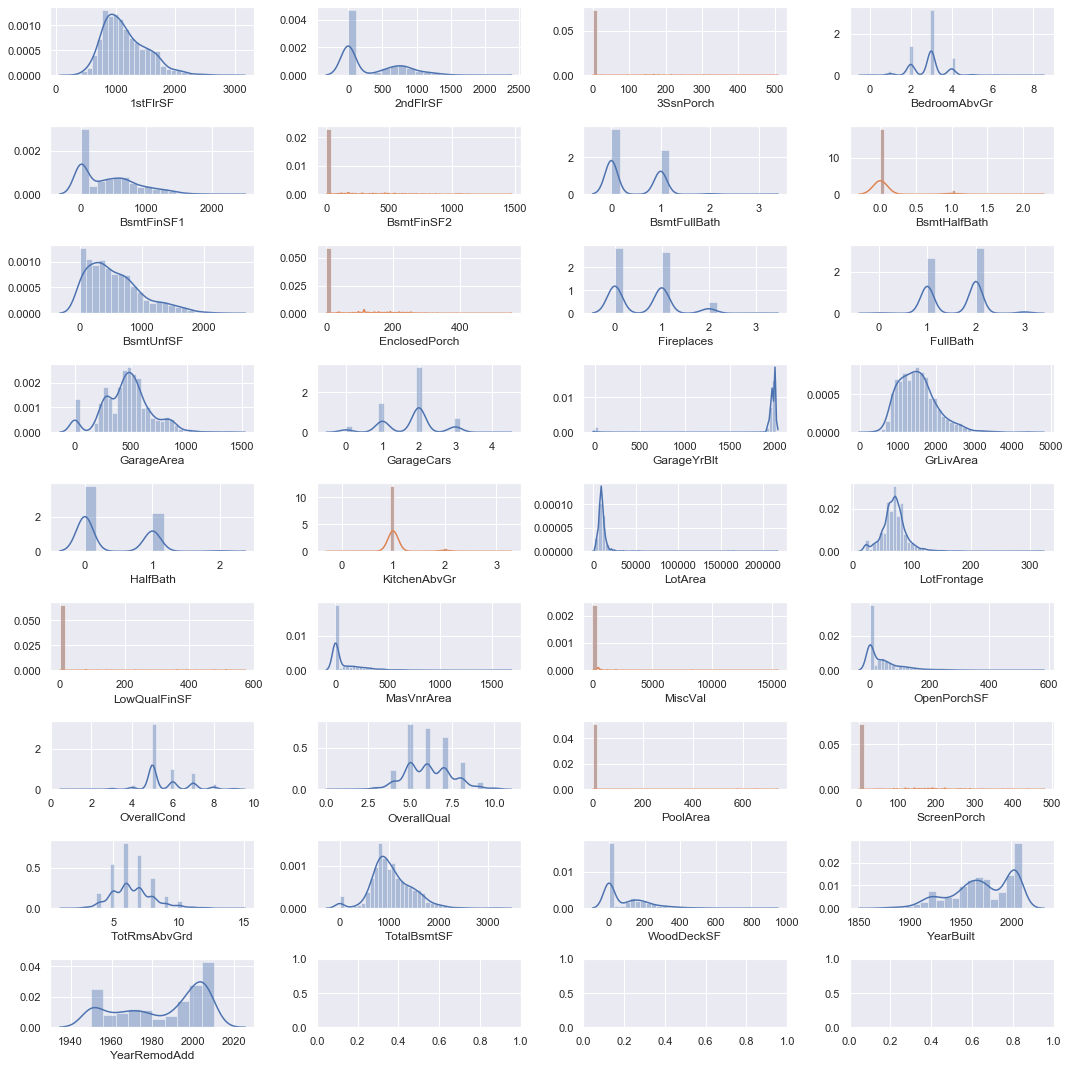

MiscVal          24.426546
PoolArea         15.927003
LotArea          12.557798
3SsnPorch        10.282886
LowQualFinSF      8.992490
KitchenAbvGr      4.478508
BsmtFinSF2        4.245879
ScreenPorch       4.113045
BsmtHalfBath      4.094248
EnclosedPorch     3.094937
MasVnrArea        2.692486
OpenPorchSF       2.337934
LotFrontage       1.548992
WoodDeckSF        1.547692
GrLivArea         1.001748
BsmtUnfSF         0.913687
2ndFlrSF          0.811079
1stFlrSF          0.805073
BsmtFinSF1        0.765935
OverallCond       0.689307
HalfBath          0.678259
TotRmsAbvGrd      0.660287
Fireplaces        0.632526
BsmtFullBath      0.591647
TotalBsmtSF       0.438389
BedroomAbvGr      0.213475
OverallQual       0.201934
GarageArea        0.132272
FullBath          0.024524
GarageCars       -0.341318
YearRemodAdd     -0.500458
YearBuilt        -0.610560
GarageYrBlt      -3.860824
dtype: float64


In [18]:
attributesNumeric = []
for attr in attributes.columns:
    if (attributes[attr].dtype in (['int64', 'float64'])) and (attr != 'SalePriceLog1p') and (attr != 'Id'):
        attributesNumeric.append(attr)
attributesNumeric.sort()

ncol = 4
nrow = math.ceil(len(attributesNumeric) / ncol)

fig, axarr = plt.subplots(nrows = nrow, ncols = ncol, figsize=(15,15))
i = 0; j = 0;
for attr in attributesNumeric:
    try:
        axarr[i, j] = sns.distplot(attributes[attr], ax=axarr[i, j])
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estiamte density."):
            sns.distplot(attributes[attr], kde_kws={'bw': 0.1}, ax=axarr[i, j])
        else:
            raise re
    
    if j >= (ncol - 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

fig.tight_layout()
plt.show()

attributesSkewness = attributes[attributesNumeric].apply(lambda x: skew(x)).sort_values(ascending=False)
print(attributesSkewness)

Fix the skewness where it is > 0.5

In [19]:
skewGreater05 = attributesSkewness[attributesSkewness > 0.5]
for attr in skewGreater05.index:
    attributes[attr] = boxcox1p(attributes[attr], boxcox_normmax(attributes[attr] + 1))

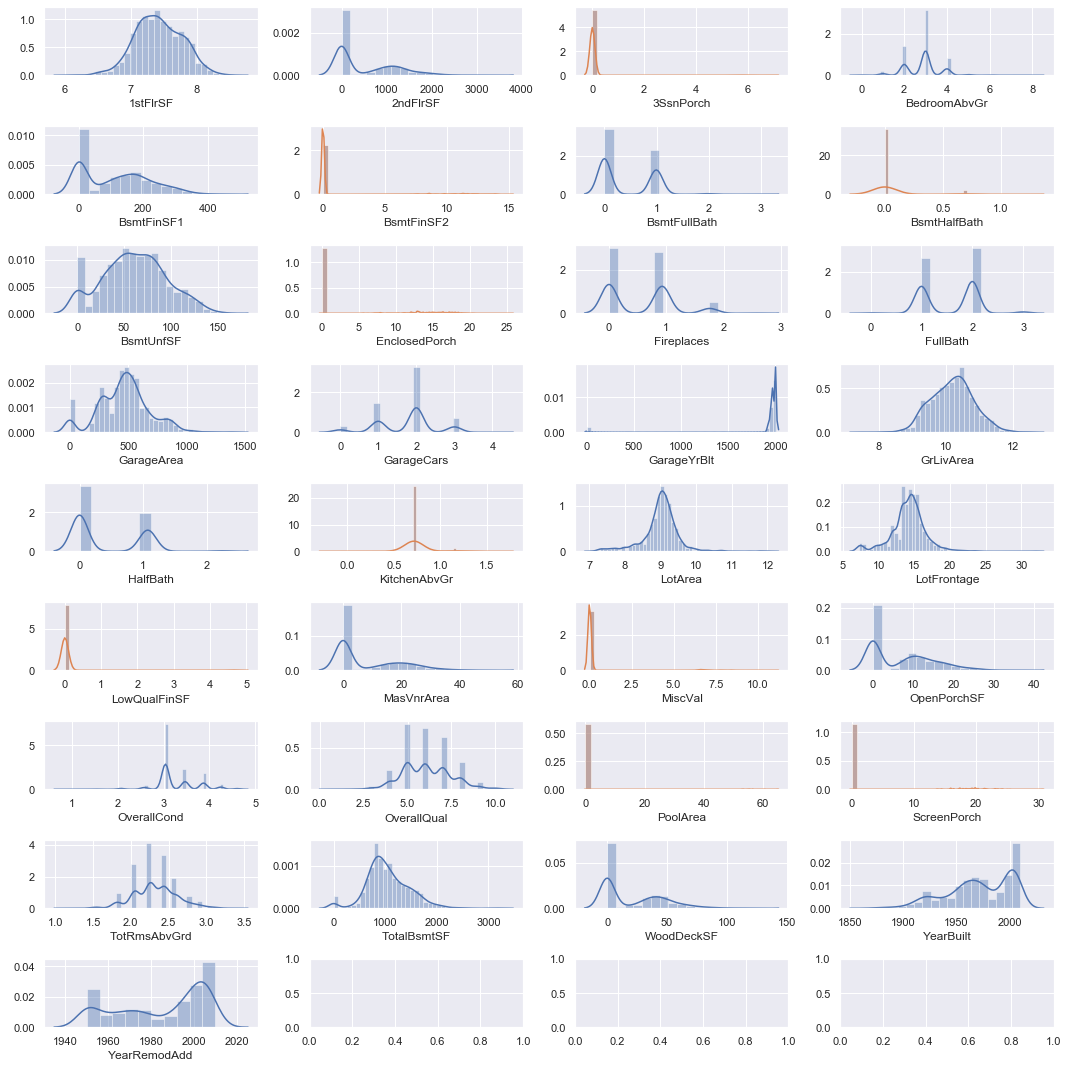

PoolArea         15.618624
3SsnPorch         7.735939
LowQualFinSF      7.384617
MiscVal           5.194099
KitchenAbvGr      3.948616
BsmtHalfBath      3.920427
ScreenPorch       3.324192
BsmtFinSF2        2.641538
EnclosedPorch     2.290028
MasVnrArea        0.954964
2ndFlrSF          0.884102
WoodDeckSF        0.779184
HalfBath          0.714237
OpenPorchSF       0.625439
BsmtFullBath      0.587055
Fireplaces        0.511594
TotalBsmtSF       0.438389
BsmtFinSF1        0.363880
OverallCond       0.333836
BedroomAbvGr      0.213475
OverallQual       0.201934
GarageArea        0.132272
BsmtUnfSF         0.052263
TotRmsAbvGrd      0.040875
LotFrontage       0.024762
FullBath          0.024524
GrLivArea         0.013723
1stFlrSF          0.000548
LotArea          -0.193575
GarageCars       -0.341318
YearRemodAdd     -0.500458
YearBuilt        -0.610560
GarageYrBlt      -3.860824
dtype: float64


In [20]:
fig, axarr = plt.subplots(nrows = nrow, ncols = ncol, figsize=(15,15))
i = 0; j = 0;
for attr in attributesNumeric:
    try:
        axarr[i, j] = sns.distplot(attributes[attr], ax=axarr[i, j])
    except RuntimeError as re:
        if str(re).startswith("Selected KDE bandwidth is 0. Cannot estiamte density."):
            sns.distplot(attributes[attr], kde_kws={'bw': 0.1}, ax=axarr[i, j])
        else:
            raise re
    
    if j >= (ncol - 1):
        i = i + 1
        j = 0
    else:
        j = j + 1

fig.tight_layout()
plt.show()

attributesSkewness = attributes[attributesNumeric].apply(lambda x: skew(x)).sort_values(ascending=False)
print(attributesSkewness)

This looks better

#### Look at the correlations of each feature to see what is a good predictor for SalePrice

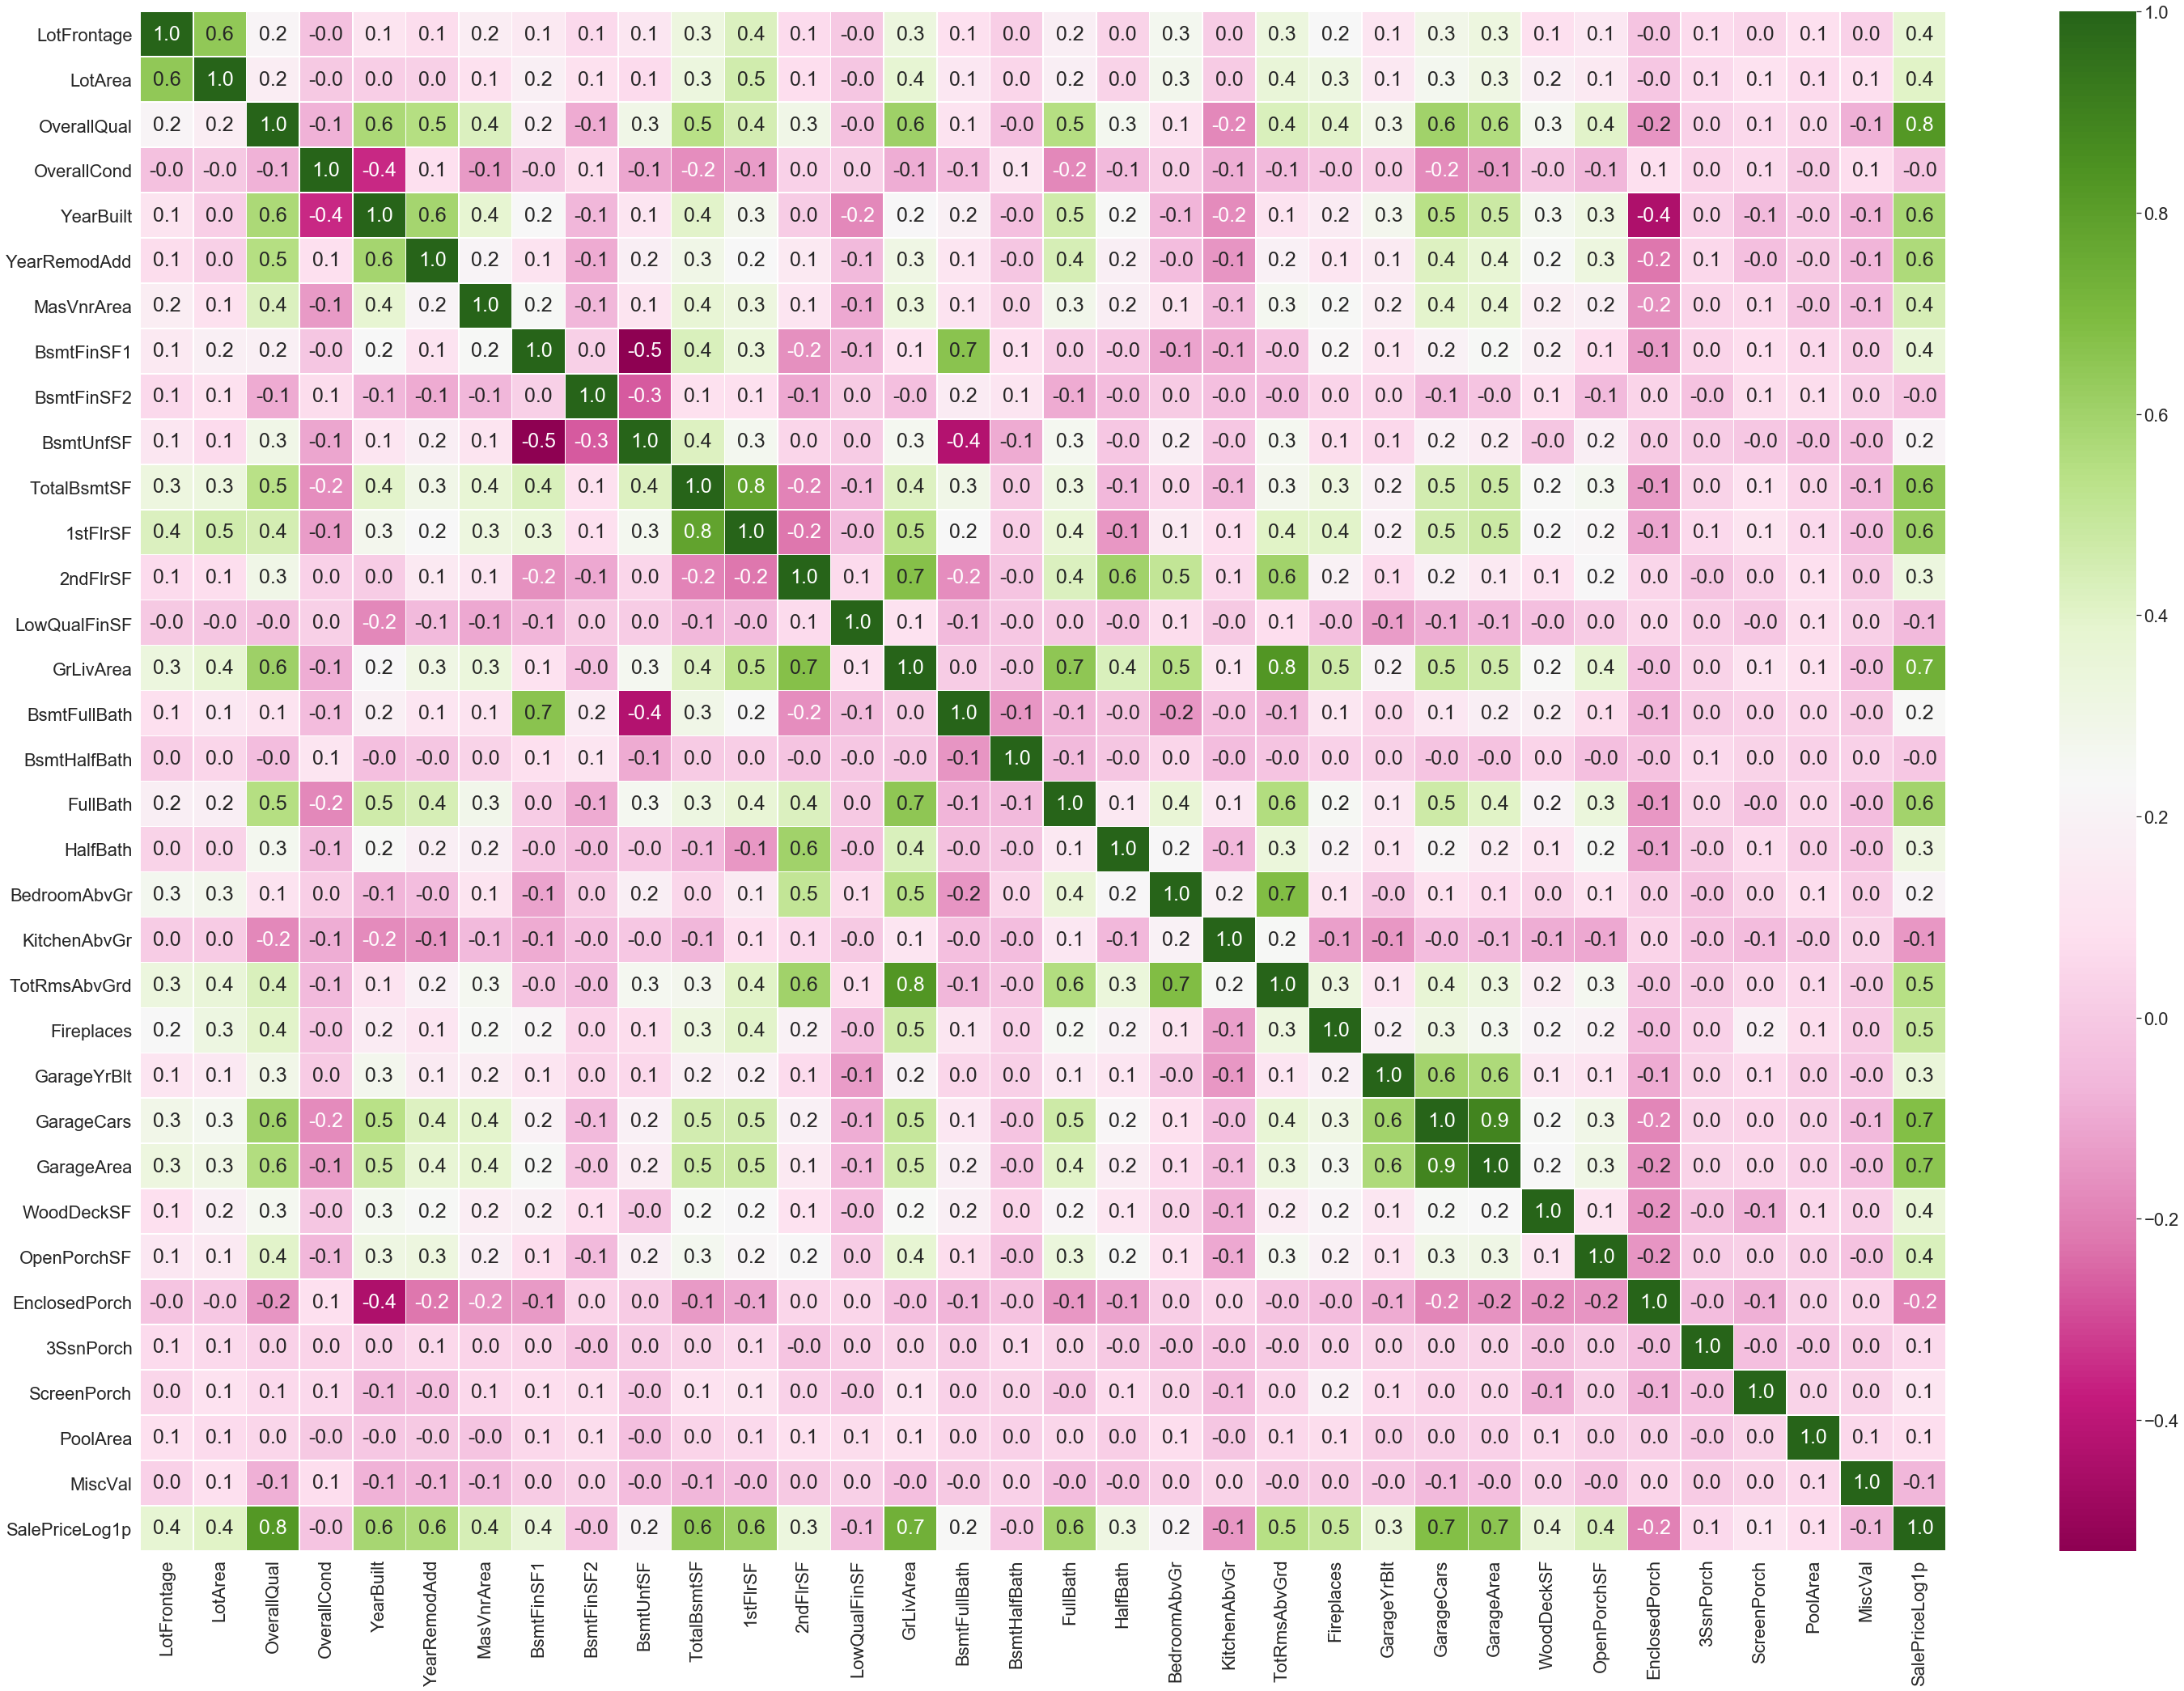

In [21]:
correlation = attributes.corr()
sns.set(font_scale=2)
plt.figure(figsize=(50,35))
ax = sns.heatmap(correlation, annot=True, annot_kws={'size': 25}, fmt = '.1f', cmap="PiYG", linewidths=.5)
plt.show()
sns.set()

#### Feature Engineering: Create additional features to enhance the model
Based on the above correlation matrix, these features have good correlation amongst each other and SalePrice. We will simplify some of the attributes like pool, second floor, basement, and fireplace to make these a yes or no as opposed to numeric quantities. These should be yes/no categorial. Lastly, there are features that have good correlations with SalePrice we can combine

Ratio features to be computed and added to the model
- YearBuildAndRemod = YearBuilt + YearRemodAdd
- TotalSF = TotalBsmtSF + 1stFlrSF + 2ndFlrSF
- TotalSqrFootage = BsmtFinSF1 + BsmtFinSF2, + 1stFlrSF + 2ndFlrSF
- TotalBathrooms = (FullBath + (0.5 * HalfBath) + BsmtFullBath + (0.5 * BsmtHalfBath)
- TotalPorchSF = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF

Nominal features to be determined and be added to the model, 1 = has the feature and 0 = does not have the feature
- HasPool = If PoolArea > 0
- HasSecondFloor = If 2ndFlrSF > 0
- HasGarage = If GarageArea > 0
- HasBasement = If TotalBsmtSF > 0
- HasFireplace = If Fireplaces > 0

In [22]:
# Combine the YearBuilt and YearRemod - it would make sense if a house remodeled earlier that it would improve
# the value
attributes['YearBuildAndRemod'] = attributes.YearBuilt + attributes.YearRemodAdd
# Calculate the total square feet
attributes['TotalSF'] = attributes.TotalBsmtSF + attributes['1stFlrSF'] + attributes['2ndFlrSF']
# Calculate the total sqr footage
attributes['TotalSqrFootage'] = attributes.BsmtFinSF1 + attributes.BsmtFinSF2 + attributes['1stFlrSF'] \
    + attributes['2ndFlrSF']
# Calculate the total bathrooms
attributes['TotalBathrooms'] = (attributes.FullBath + (0.5 * attributes.HalfBath) + \
    attributes.BsmtFullBath + (0.5 * attributes.BsmtHalfBath))
# Calculate the total porch square feet
attributes['TotalPorchSF'] = attributes.OpenPorchSF + attributes['3SsnPorch'] + attributes.EnclosedPorch \
    + attributes.ScreenPorch + attributes.WoodDeckSF

# Determine the property has a pool
attributes['HasPool'] = attributes.PoolArea.apply(lambda x: 1 if x > 0 else 0)
# Determine the property has a second floor
attributes['HasSecondFloor'] = attributes['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# Determine the property has a garage
attributes['HasGarage'] = attributes.GarageArea.apply(lambda x: 1 if x > 0 else 0)
# Determine the property has a basement
attributes['HasBasement'] = attributes.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
# Determine the property has a basement
attributes['HasFireplace'] = attributes.Fireplaces.apply(lambda x: 1 if x > 0 else 0)

Let's relook at the correlation, limited to just SalePrice

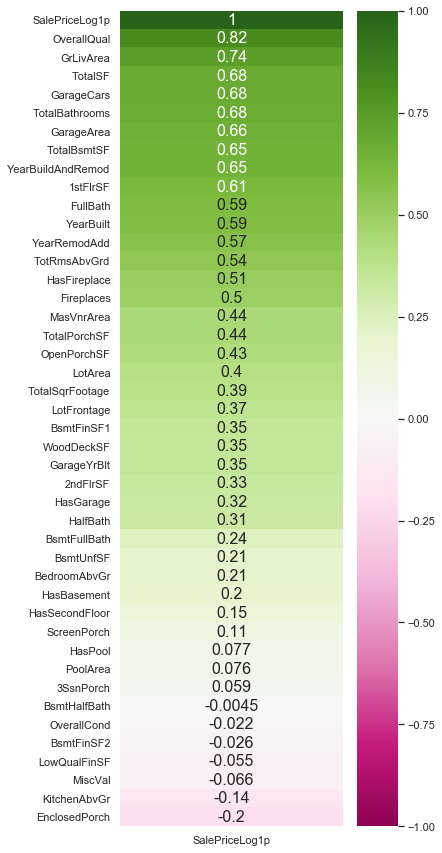

In [23]:
# limit to only the identified attributes
correlation=attributes.corr()
plt.figure(figsize=(5,15))
sns.heatmap(correlation[['SalePriceLog1p']].sort_values(by=['SalePriceLog1p'],\
            ascending=False),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
#sns.set(font_scale=2)
fig.tight_layout()
plt.show()
sns.set()

Use the pandas get_dumies function which will convert all the categorial variables to indicator variables

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [24]:
allAttributes = pd.get_dummies(attributes).reset_index(drop=True)

allAttributes.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,13.800951,8.934681,7,3.041769,2003,2003,19.455306,189.684371,0.0,30.417780,...,0,0,0,1,0,0,0,0,1,0
1,15.468419,9.059224,6,4.250204,1976,1976,0.000000,243.163034,0.0,44.863698,...,0,0,0,1,0,0,0,0,1,0
2,14.148846,9.213978,7,3.041769,2001,2002,17.788196,142.649657,0.0,57.923520,...,0,0,0,1,0,0,0,0,1,0
3,13.202642,9.054128,7,3.041769,1915,1970,0.000000,76.668946,0.0,66.031075,...,0,0,0,1,1,0,0,0,0,0
4,15.885740,9.445195,8,3.041769,2000,2000,25.437011,179.141496,0.0,62.297857,...,0,0,0,1,0,0,0,0,1,0


The following had a big impact on the RMSE, let's remove

In [25]:
overfitColumns = []
for i in allAttributes.columns:
    counts = allAttributes[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(allAttributes) * 100 > 99.94:
        overfitColumns.append(i)

overfitColumns = list(overfitColumns)
overfitColumns.append('MSZoning_C (all)')

print('Dropping columns: {}'.format(overfitColumns))
allAttributes = allAttributes.drop(overfitColumns, axis=1).copy()

Dropping columns: ['MSZoning_C (all)']


Let's relook at the correlation after doing get dummies, limited to just SalePrice

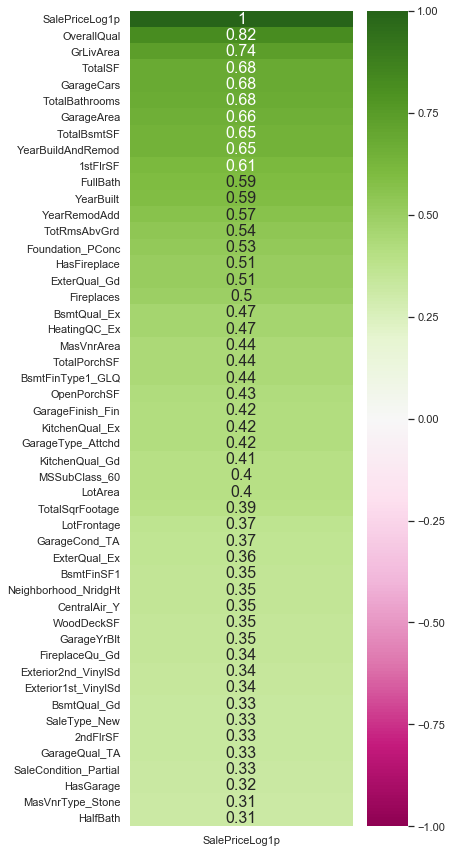

In [26]:
# limit to only the identified attributes, limit to the top 50 features
correlation=allAttributes.corr()
plt.figure(figsize=(5,15))
sns.heatmap(correlation[['SalePriceLog1p']].sort_values(by=['SalePriceLog1p'],\
            ascending=False).head(50),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
#sns.set(font_scale=2)
fig.tight_layout()
plt.show()
sns.set()

Based on the transformations we now have enough features through data cleanup and feature engineering and we are ready to create our regression models

### Review research design and modeling methods (10 points)

#### Create functions to evaluate different alphas to use in Ridge, Lasso, and Elastic Net
The following functions will evaluate using different alphas in Ridge, Lasso, and Elastic net and calculate the mean absolute error, mean squared error, and root mean squared error to analyze which model perfoms best on the data

In [27]:
alphas = [1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, \
                    1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100] #1e-15, 
alphasLasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphasElasticNet = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
l1_ratioElasticNet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

# Ridge Regression
def ridgeScores():   
    scoresRidge = []
    for alpha in alphas:
        ridge = Ridge(alpha=alpha).fit(X_train, y_train)
        y_pred = ridge.predict(X_test)
        
        # get the accuracy of train, test, and the MAE, MSE, and RMSE
        trainScore = ridge.score(X_train, y_train)
        testScore = ridge.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        
        scoresRidge.append([alpha, trainScore, testScore, mae, mse, rmse])
    
    return scoresRidge

# Lasso Regression
def lassoScores(max_iter = 700000):   
    scoresLasso = []
    i = 0
    for alpha in alphasLasso:
        lasso = Lasso(alpha=alpha, max_iter=max_iter).fit(X_train, y_train)
        y_pred = lasso.predict(X_test)
        
        # get the accuracy of train, test, and the MAE, MSE, and RMSE
        trainScore = lasso.score(X_train, y_train)
        testScore = lasso.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        
        scoresLasso.append([alpha, trainScore, testScore, mae, mse, rmse])
    
    return scoresLasso

# Elastic Net
def elasticNetScores(max_iter = 1200000):   
    elasticNetScores = []
    i = 0
    for alpha in alphasElasticNet:
        for l1_ratio in l1_ratioElasticNet:
            elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter).fit(X_train, y_train)
            y_pred = elastic.predict(X_test)

            # get the accuracy of train, test, and the MAE, MSE, and RMSE
            trainScore = elastic.score(X_train, y_train)
            testScore = elastic.score(X_test, y_test)
            mae = metrics.mean_absolute_error(y_test, y_pred)
            mse = metrics.mean_squared_error(y_test, y_pred)  
            rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

            elasticNetScores.append([alpha, l1_ratio, trainScore, testScore, mae, mse, rmse])
    
    return elasticNetScores

def plotPerformance(df):
    df = pd.DataFrame(df, columns =['alpha', 'Train Score', 'Test Score', 'MAE', 'MSE', 'RMSE'])
    fig, axarr = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
    # plot alpha performance with RMSE
    sns.regplot(df.alpha, df.RMSE, ax=axarr[0]).set_title('Alpha and RMSE Performance')

    # plot performance of training and test data sets on accuracy
    trScore = pd.DataFrame(df[['alpha', 'Train Score']])
    trScore['Dataset'] = 'Train'
    trScore = trScore.rename(columns={'Train Score': 'Score'})
    teScore = pd.DataFrame(df[['alpha', 'Test Score']])
    teScore['Dataset'] = 'Test'
    teScore = teScore.rename(columns={'Test Score': 'Score'})
    plotScore = pd.concat([trScore, teScore])
    sns.lineplot(x='alpha', y='Score', hue='Dataset', data=plotScore, ax=axarr[1]).\
        set_title("Train and Test Performance Score (Accuracy)")

    # Display
    display(plt.show())
    display(df)
    fig.tight_layout()
    plt.show()
    
    return df
    
def plotPerformanceElasticNet(df):
    df = pd.DataFrame(df, columns =['alpha', 'l1_ratio', 'Train Score', 'Test Score', 'MAE', 'MSE', 'RMSE'])
    display(df)
    
    return df

#### Setup training data
Use the train_test_split function to evaluate the performance of each model
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:
# Set up training data
y = allAttributes.SalePriceLog1p
X = allAttributes.drop(['SalePriceLog1p'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('Y_train shape: {}'.format(X_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1165, 339)
X_test shape: (292, 339)
Y_train shape: (1165, 339)
y_test shape: (292,)


#### Linear Regression

In [29]:
print('\t...Starting Linear Regression')
start = timeit.default_timer()

lr = LinearRegression().fit(X_train, y_train)
print('Training set score: {:2f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:2f}'.format(lr.score(X_test, y_test)))
print('')
y_pred = lr.predict(X_test)
lrMAE = metrics.mean_absolute_error(y_test, y_pred)
lrMSE = metrics.mean_squared_error(y_test, y_pred)
lrRMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', lrMAE)  
print('Mean Squared Error:', lrMSE)  
print('Root Mean Squared Error:', lrRMSE)

stop = timeit.default_timer()
print('\tCompleted... Runtime = {}'.format(stop - start))

	...Starting Linear Regression
Training set score: 0.955352
Test set score: -1320681.069560

Mean Absolute Error: 38.386739795118885
Mean Squared Error: 214238.29919306177
Root Mean Squared Error: 462.8588328994725
	Completed... Runtime = 0.03634968299999741


#### Ridge Scores

	...Starting Ridge


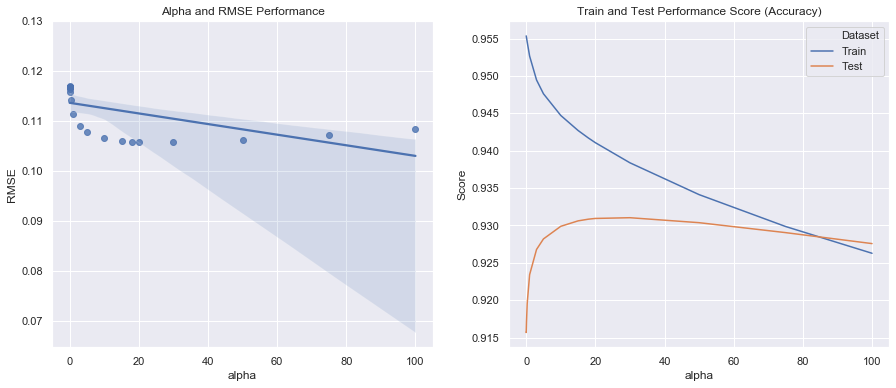

None

,alpha,Train Score,Test Score,MAE,MSE,RMSE
0,1.000000e-10,0.955352,0.915714,0.081041,0.013673,0.116930
1,1.000000e-08,0.955352,0.915712,0.081041,0.013673,0.116932
2,9.000000e-04,0.955352,0.915694,0.081032,0.013676,0.116944
3,7.000000e-04,0.955352,0.915698,0.081034,0.013675,0.116942
4,5.000000e-04,0.955352,0.915701,0.081036,0.013675,0.116939
5,3.000000e-04,0.955352,0.915705,0.081038,0.013674,0.116936
6,1.000000e-04,0.955352,0.915709,0.081040,0.013673,0.116934
7,1.000000e-03,0.955352,0.915693,0.081031,0.013676,0.116945
8,5.000000e-02,0.955262,0.916302,0.080470,0.013577,0.116522
9,1.000000e-02,0.955340,0.915677,0.080920,0.013679,0.116956


Train shape: (1165, 339)
Test shape: (292, 339)
	Completed... Runtime = 1.0708307390000016


In [30]:
print('\t...Starting Ridge')
start = timeit.default_timer()

scoresRidge = ridgeScores()
ridgeResults = plotPerformance(scoresRidge)

stop = timeit.default_timer()
print('Train shape: {}\nTest shape: {}'.format(X_train.shape, X_test.shape))
print('\tCompleted... Runtime = {}'.format(stop - start))

#### Lasso Regression

	...Starting Lasso


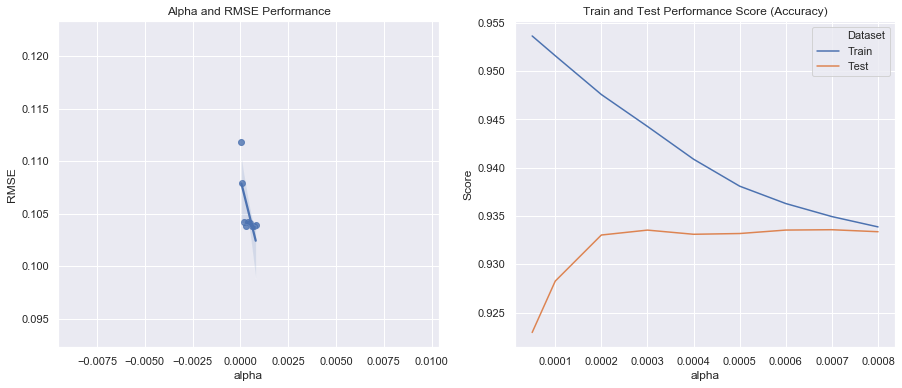

None

,alpha,Train Score,Test Score,MAE,MSE,RMSE
0,0.00005,0.953644,0.922947,0.076496,0.012499,0.111801
1,0.00010,0.951599,0.928261,0.074610,0.011637,0.107876
2,0.00020,0.947582,0.933036,0.073788,0.010863,0.104225
3,0.00030,0.944280,0.933545,0.073654,0.010780,0.103828
4,0.00040,0.940886,0.933113,0.073943,0.010850,0.104164
5,0.00050,0.938093,0.933191,0.073769,0.010838,0.104104
6,0.00060,0.936295,0.933549,0.073678,0.010779,0.103824
7,0.00070,0.934945,0.933585,0.073826,0.010774,0.103796
8,0.00080,0.933878,0.933377,0.074093,0.010807,0.103959


Train shape: (1165, 339)
Test shape: (292, 339)
	Completed... Runtime = 210.140368441


In [31]:
print('\t...Starting Lasso')
start = timeit.default_timer()

scoresLasso = lassoScores()
lassoResults = plotPerformance(scoresLasso)

stop = timeit.default_timer()
print('Train shape: {}\nTest shape: {}'.format(X_train.shape, X_test.shape))
print('\tCompleted... Runtime = {}'.format(stop - start))

#### Elastic Net

In [32]:
print('\t...Starting Net Scaler')
start = timeit.default_timer()

scoresElasticNet = elasticNetScores()
netScalerResults = plotPerformanceElasticNet(scoresElasticNet)

stop = timeit.default_timer()
print('Train shape: {}\nTest shape: {}'.format(X_train.shape, X_test.shape))
print('\tCompleted... Runtime = {}'.format(stop - start))

	...Starting Net Scaler


,alpha,l1_ratio,Train Score,Test Score,MAE,MSE,RMSE
0,0.0001,0.80,0.952354,0.926580,0.075324,0.011910,0.109133
1,0.0001,0.85,0.952174,0.927010,0.075134,0.011840,0.108813
2,0.0001,0.90,0.951984,0.927427,0.074949,0.011773,0.108502
3,0.0001,0.95,0.951790,0.927849,0.074765,0.011704,0.108186
4,0.0001,0.99,0.951637,0.928184,0.074630,0.011650,0.107934
5,0.0001,1.00,0.951599,0.928261,0.074610,0.011637,0.107876
6,0.0002,0.80,0.948979,0.931621,0.074196,0.011092,0.105320
7,0.0002,0.85,0.948632,0.931978,0.074120,0.011034,0.105045
8,0.0002,0.90,0.948292,0.932354,0.074014,0.010973,0.104754
9,0.0002,0.95,0.947936,0.932725,0.073897,0.010913,0.104467


Train shape: (1165, 339)
Test shape: (292, 339)
	Completed... Runtime = 1275.545824249


## Review results, evaluate models (10 points)

### Evaluate Linear vs. Ridge vs. Lasso vs. NetScaler

#### Compare The Train vs. Test, MAE, MSE, RMSE of Ridge, Lasso, Elastic Net -- We ignore Linear Regression in this analysis and save for the overall

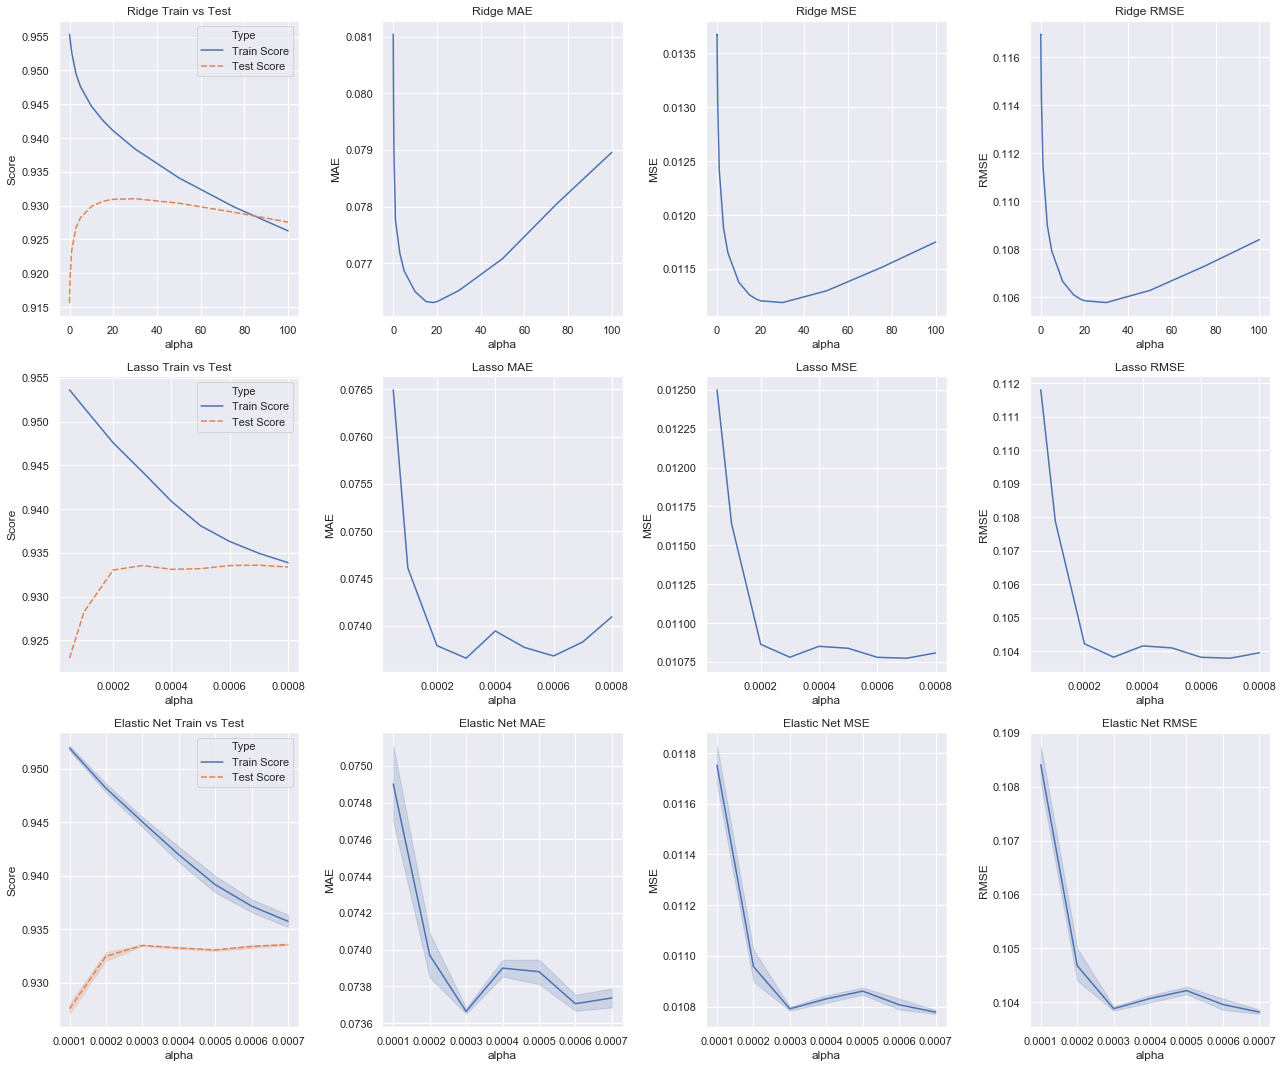

In [33]:
fig, axarr = plt.subplots(nrows = 3, ncols = 4, figsize=(18,15))

# ridge
df1 = ridgeResults[['alpha', 'Train Score']]; df1 = df1.rename(columns={"Train Score": "Score"})
df2 = ridgeResults[['alpha', 'Test Score']]; df2 = df2.rename(columns={"Test Score": "Score"})
df1['Type'] = 'Train Score'; df2['Type'] = 'Test Score' 
df = pd.concat([df1, df2])

sns.lineplot(x='alpha', y='Score', hue='Type', style='Type', ax=axarr[0][0], data=df)\
    .set_title('Ridge Train vs Test')
sns.lineplot(x='alpha', y='MAE', ax=axarr[0][1], data=ridgeResults).set_title('Ridge MAE')
sns.lineplot(x='alpha', y='MSE', ax=axarr[0][2], data=ridgeResults).set_title('Ridge MSE')
sns.lineplot(x='alpha', y='RMSE', ax=axarr[0][3], data=ridgeResults).set_title('Ridge RMSE')

# lasso
df1 = lassoResults[['alpha', 'Train Score']]; df1 = df1.rename(columns={"Train Score": "Score"})
df2 = lassoResults[['alpha', 'Test Score']]; df2 = df2.rename(columns={"Test Score": "Score"})
df1['Type'] = 'Train Score'; df2['Type'] = 'Test Score' 
df = pd.concat([df1, df2])

sns.lineplot(x='alpha', y='Score', hue='Type', style='Type', ax=axarr[1][0], data=df)\
    .set_title('Lasso Train vs Test')
sns.lineplot(x='alpha', y='MAE', ax=axarr[1][1], data=lassoResults).set_title('Lasso MAE')
sns.lineplot(x='alpha', y='MSE', ax=axarr[1][2], data=lassoResults).set_title('Lasso MSE')
sns.lineplot(x='alpha', y='RMSE', ax=axarr[1][3], data=lassoResults).set_title('Lasso RMSE')


# Elastic Net
df1 = netScalerResults[['alpha', 'Train Score']]; df1 = df1.rename(columns={"Train Score": "Score"})
df2 = netScalerResults[['alpha', 'Test Score']]; df2 = df2.rename(columns={"Test Score": "Score"})
df1['Type'] = 'Train Score'; df2['Type'] = 'Test Score' 
df = pd.concat([df1, df2])

sns.lineplot(x='alpha', y='Score', hue='Type', style='Type', ax=axarr[2][0], data=df)\
    .set_title('Elastic Net Train vs Test')
sns.lineplot(x='alpha', y='MAE', ax=axarr[2][1], data=netScalerResults).set_title('Elastic Net MAE')
sns.lineplot(x='alpha', y='MSE', ax=axarr[2][2], data=netScalerResults).set_title('Elastic Net MSE')
sns.lineplot(x='alpha', y='RMSE', ax=axarr[2][3], data=netScalerResults).set_title('Elastic Net RMSE')

fig.tight_layout()
plt.show()

#### Get the lowest root mean squared error (RMSE) for each model

In [34]:
pd.DataFrame([['a', 1], ['b', 2]])

ridgeIndex = ridgeResults.RMSE.idxmin()
lassoIndex = lassoResults.RMSE.idxmin()
netScalerIndex = netScalerResults.RMSE.idxmin()

modelSummary = pd.DataFrame([['Linear Regression', np.NaN, np.NaN, lrRMSE],
            ['Ridge Regression', ridgeResults.alpha[ridgeIndex], np.NaN, ridgeResults.RMSE[ridgeIndex]],
            ['Lasso Regression', lassoResults.alpha[lassoIndex], np.NaN, lassoResults.RMSE[lassoIndex]],
            ['Elastic Net Regression', netScalerResults.alpha[netScalerIndex], \
                 netScalerResults.l1_ratio[netScalerIndex], netScalerResults.RMSE[netScalerIndex]]],
            columns = ['Model', 'alpha', 'l1_ratio', 'RMSE'])

modelSummary

,Model,alpha,l1_ratio,RMSE
0,Linear Regression,NaN,NaN,462.858833
1,Ridge Regression,30.0000,NaN,0.105772
2,Lasso Regression,0.0007,NaN,0.103796
3,Elastic Net Regression,0.0007,0.95,0.103769


#### Determine out of all the models which has the lowest RMSE

In [35]:
bestModelIndex = modelSummary.RMSE.idxmin()
modelSummary.loc[bestModelIndex]

Model       Elastic Net Regression
alpha                       0.0007
l1_ratio                      0.95
RMSE                      0.103769
Name: 3, dtype: object

#### Conclusion

Based on the graphs and best RMSE score it would appear Lasso with alpha = 0.0007 and Elastic Net with an alpha of 0.0007 and l1_ratio of 0.95 performs the best with elastic net having a RMSE of 0.103769 followed by lasso with 0.103796. It would appear if Lasso based on the graphs flattens better on the MAE, MSE, and RMSE after the best is attained.

We will submit score for Ridge, Lasso, and Elastic Net to see which performed better on the Kaggle House Prices: Advanced Regression Techniques competition.

Before we do that though, I would like to apply additional regression methods I found on the discussion forums and see how that performs as well. The next section will evaluate these models and blend them together

### Evaluate addition Regression Models that may produce a better score
- Support Vector Machine - Regression (SVR): Epsilon-Support Vector Regression https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
- Gradient Boosting Regressor: GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- LightGBM: is a gradient boosting framework that uses tree based learning algorithms https://lightgbm.readthedocs.io/en/latest/
- XGBOOST: is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. https://xgboost.readthedocs.io/en/latest/
- StackingRegressor: Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs -- meta-features -- of the individual regression models in the ensemble. http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/

In [36]:
def runMultiModel(testing = True):
    results = []
    warnings.simplefilter('ignore')
    
    # setup models
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    alphas = [1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, \
                    1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100] #1e-15, 
    alphasLasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    alphasElasticNet = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
    l1_ratioElasticNet = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

    # setup models    
    alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
    alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
    e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
    
    ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds))

    lasso = make_pipeline(RobustScaler(),
                          LassoCV(max_iter=1e7, alphas=alphas2,
                                  random_state=42, cv=kfolds))

    elasticnet = make_pipeline(RobustScaler(),
                               ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                            cv=kfolds, l1_ratio=e_l1ratio))

    svr = make_pipeline(RobustScaler(),
                          SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

    gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                       max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10, 
                                       loss='huber', random_state =42)

    lightgbm = LGBMRegressor(objective='regression', 
                                           num_leaves=4,
                                           learning_rate=0.01, 
                                           n_estimators=5000,
                                           max_bin=200, 
                                           bagging_fraction=0.75,
                                           bagging_freq=5, 
                                           bagging_seed=7,
                                           feature_fraction=0.2,
                                           feature_fraction_seed=7,
                                           verbose=-1,
                                           #min_data_in_leaf=2,
                                           #min_sum_hessian_in_leaf=11
                                           )


    xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                         max_depth=3, min_child_weight=0,
                                         gamma=0, subsample=0.7,
                                         colsample_bytree=0.7,
                                         objective='reg:linear', nthread=-1,
                                         scale_pos_weight=1, seed=27,
                                         reg_alpha=0.00006, silent=True)

    # stack
    stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet,
                                                gbr, xgboost, lightgbm),
                                    meta_regressor=xgboost,
                                    use_features_in_secondary=True)
    
    # Generate models
    
    # Stack Gen
    print('Stack Gen:')
    print('\tStarting...')
    start = timeit.default_timer()
    stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))
    if testing == True:
        y_pred = stack_gen_model.predict(np.array(X_test))
        trainScore = stack_gen_model.score(np.array(X_train), np.array(y_train))
        testScore = stack_gen_model.score(np.array(X_test), np.array(y_test))
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        results.append(['Stack Gen', trainScore, testScore, mae, mse, rmse])
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))
    
    
    # Elastic Net
    print('Elastic Net:')
    print('\tStarting...')
    start = timeit.default_timer()
    elastic_model = elasticnet.fit(X_train, y_train)
    if testing == True:
        y_pred = elastic_model.predict(X_test)
        trainScore = elastic_model.score(X_train, y_train)
        testScore = elastic_model.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        results.append(['Elastic Net', trainScore, testScore, mae, mse, rmse])
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))
        
    # Lasso
    print('Lasso:')
    print('\tStarting...')
    start = timeit.default_timer()
    lasso_model = lasso.fit(X_train, y_train)
    if testing == True:
        y_pred = lasso_model.predict(X_test)
        trainScore = lasso_model.score(X_train, y_train)
        testScore = lasso_model.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        results.append(['Lasso', trainScore, testScore, mae, mse, rmse])
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))
    
    # Ridge
    print('Ridge:')
    print('\tStarting...')
    start = timeit.default_timer()
    ridge_model = ridge.fit(X_train, y_train)
    if testing == True:
        y_pred = ridge_model.predict(X_test)
        trainScore = ridge_model.score(X_train, y_train)
        testScore = ridge_model.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        results.append(['Ridge', trainScore, testScore, mae, mse, rmse])
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))
    
    #SVR
    print('SVR:')
    print('\tStarting...')
    start = timeit.default_timer()
    svr_model = svr.fit(X_train, y_train)
    if testing == True:
        y_pred = svr_model.predict(X_test)
        trainScore = svr_model.score(X_train, y_train)
        testScore = svr_model.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        results.append(['SVR', trainScore, testScore, mae, mse, rmse])
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))
        
    # GBR
    print('GBR:')
    start = timeit.default_timer()
    gbr_model = gbr.fit(X_train, y_train)
    if testing == True:
        y_pred = gbr_model.predict(X_test)
        trainScore = gbr_model.score(X_train, y_train)
        testScore = gbr_model.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        results.append(['GBR', trainScore, testScore, mae, mse, rmse])
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))
    
    # XGB
    print('XGB:')
    print('\tStarting...')
    start = timeit.default_timer()
    xgb_model = xgboost.fit(X_train, y_train)
    if testing == True:
        y_pred = xgb_model.predict(X_test)
        trainScore = xgb_model.score(X_train, y_train)
        testScore = xgb_model.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        results.append(['XGB', trainScore, testScore, mae, mse, rmse])
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))
    
    # LGB
    print('LGB:')
    print('\tStarting...')
    start = timeit.default_timer()
    lgb_model = lightgbm.fit(X_train, y_train)
    if testing == True:
        y_pred = lgb_model.predict(X_test)
        trainScore = lgb_model.score(X_train, y_train)
        testScore = lgb_model.score(X_test, y_test)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)  
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        results.append(['LGB', trainScore, testScore, mae, mse, rmse])
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))
    
    print('Blended:')
    print('\tStarting...')
    y_pred = ((0.1 * elastic_model.predict(X_test)) + \
        (0.1 * lasso_model.predict(X_test)) + \
        (0.1 * ridge_model.predict(X_test)) + \
        (0.1 * svr_model.predict(X_test)) + \
        (0.1 * gbr_model.predict(X_test)) + \
        (0.15 * xgb_model.predict(X_test)) + \
        (0.1 * lgb_model.predict(X_test)) + \
        (0.25 * stack_gen_model.predict(np.array(X_test))))
    #y_pred = ((0.15 * elastic_model.predict(X_test)) + \
    #    (0.25 * lasso_model.predict(X_test)) + \
    #    (0.1 * ridge_model.predict(X_test)) + \
    #    (0.1 * svr_model.predict(X_test)) + \
    #    (0.05 * gbr_model.predict(X_test)) + \
    #    (0.05 * xgb_model.predict(X_test)) + \
    #    (0.05 * lgb_model.predict(X_test)) + \
    #    (0.25 * stack_gen_model.predict(np.array(X_test))))
    
    if testing == True:
        mae = metrics.mean_absolute_error(y_test, y_pred)
        mse = metrics.mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) 
        results.append(['Blended', np.NaN, np.NaN, mae, mse, rmse])
        
    stop = timeit.default_timer()
    print('\tCompleted... Runtime = {}'.format(stop - start))

    return results, y_pred

In [37]:
df, y = runMultiModel()
pd.DataFrame(df, columns =['Model', 'Train Score', 'Test Score', 'MAE', 'MSE', 'RMSE'])

Stack Gen:
	Starting...
	Completed... Runtime = 157.71604912299995
Elastic Net:
	Starting...
	Completed... Runtime = 4.2221927319999395
Lasso:
	Starting...
	Completed... Runtime = 0.9598176679999142
Ridge:
	Starting...
	Completed... Runtime = 0.7810305909999897
SVR:
	Starting...
	Completed... Runtime = 1.404396911000049
GBR:
	Completed... Runtime = 7.3147347639999225
XGB:
	Starting...
	Completed... Runtime = 12.039025154
LGB:
	Starting...
	Completed... Runtime = 0.9793838210000558
Blended:
	Starting...
	Completed... Runtime = 1.2526417940000556


,Model,Train Score,Test Score,MAE,MSE,RMSE
0,Stack Gen,0.987598,0.931726,0.075293,0.011075,0.105239
1,Elastic Net,0.935900,0.932455,0.074420,0.010957,0.104676
2,Lasso,0.935480,0.932465,0.074481,0.010955,0.104668
3,Ridge,0.942854,0.929444,0.076659,0.011445,0.106983
4,SVR,0.951071,0.931070,0.073534,0.011182,0.105743
5,GBR,0.983827,0.929802,0.074536,0.011387,0.106711
6,XGB,0.987547,0.925484,0.079039,0.012088,0.109945
7,LGB,0.967655,0.922772,0.080161,0.012528,0.111927
8,Blended,NaN,NaN,0.071834,0.010383,0.101895


#### Conclusion

The blended model has an RMSE of 0.101895 which is better than the RMSE of 0.104676 and 0.104668 generated using  Lasso and Elastic Net.

We will submit scores for Ridge, Lasso, Elastic Net, and the Blended model to see which performed better on the Kaggle House Prices: Advanced Regression Techniques competition.

## Implementation and programming  as evidenced by Kaggle submission (10 points)

Use all the transformations explored earlier to create a transformation function to modify the training set and test set for submission

In [38]:
def transformDataset(dataset, training=False):
    attributes = dataset
    if(training==True):
        attributes['SalePriceLog1p'] = np.log1p(attributes.SalePrice)
        y = attributes.SalePriceLog1p.reset_index(drop=True)
        attributes = attributes.drop(['SalePrice'], axis=1)
        attributes = attributes.drop(['Id'], axis=1)

    # For attributes that are categorial and have nulls we will use the mode to impute / fill in NA
    # with the most frequent value
    attributes.Electrical = attributes.Electrical.fillna(attributes.Electrical.mode()[0])
    attributes.Functional = attributes.Functional.fillna(attributes.Functional.mode()[0])
    attributes.KitchenQual = attributes.KitchenQual.fillna(attributes.KitchenQual.mode()[0])
    attributes.Exterior1st = attributes.Exterior1st.fillna(attributes.Exterior1st.mode()[0])
    attributes.Exterior2nd = attributes.Exterior2nd.fillna(attributes.Exterior2nd.mode()[0])
    attributes.SaleType = attributes.SaleType.fillna(attributes.SaleType.mode()[0])

    # For the Garage attributes that are categorial will nulls let's change these to None since they likely do not
    # have a Garage
    attributes.GarageType = attributes.GarageType.fillna('None')
    attributes.GarageFinish = attributes.GarageFinish.fillna('None')
    attributes.GarageQual = attributes.GarageQual.fillna('None')
    attributes.GarageCond = attributes.GarageCond.fillna('None')

    # For the Basement attributes that are categorial will nulls let's change these to None since they likely do not
    # have a Basement
    attributes.BsmtQual = attributes.BsmtQual.fillna('None')
    attributes.BsmtCond = attributes.BsmtCond.fillna('None')
    attributes.BsmtExposure = attributes.BsmtExposure.fillna('None')
    attributes.BsmtFinType1 = attributes.BsmtFinType1.fillna('None')
    attributes.BsmtFinType2 = attributes.BsmtFinType2.fillna('None')

    # For PoolQC, it is categorial / nominal. This will be replaced by None since the property likely does not have
    # a pool
    attributes.PoolQC = attributes.PoolQC.fillna('None')

    # For LotFrontage, it is the linear feet of the street that is connected to a property. Let's impute this with
    # the Neighborhood median as the median of the town would be a better fit
    attributes.LotFrontage = attributes.groupby('Neighborhood')['LotFrontage']\
        .transform(lambda x: x.fillna(x.median()))

    # For MSZoning, it identifies the general zoning classification of the sale (e.g. Agriculture, Cullture, 
    # Residential High Density). It would be better to impute this with the most common value within the MSSubClass.
    # The MSSubClass is the type of dwelling involved in the sale and would be more common for the area
    attributes.MSZoning = attributes.groupby('MSSubClass')['MSZoning']\
        .transform(lambda x: x.fillna(x.mode()[0]))

    # There are predictors that are stored in the dataset that are numeric that we don't want to use in the model
    # These will be converted to strings so they are ignored in the model but available for later if needed
    attributes.MSSubClass = attributes.MSSubClass.apply(str)
    attributes.YrSold = attributes.YrSold.astype(str)
    attributes.MoSold = attributes.MoSold.astype(str)

    # Fill in numeric data with 0
    attributes.GarageCars = attributes.GarageCars.fillna(0)
    attributes.GarageArea = attributes.GarageArea.fillna(0)
    attributes.GarageYrBlt = attributes.GarageYrBlt.fillna(0)
    attributes.BsmtFinSF1 = attributes.BsmtFinSF1.fillna(0)
    attributes.BsmtFinSF2 = attributes.BsmtFinSF2.fillna(0)
    attributes.BsmtUnfSF = attributes.BsmtUnfSF.fillna(0)
    attributes.TotalBsmtSF = attributes.TotalBsmtSF.fillna(0)
    attributes.BsmtFullBath = attributes.BsmtFullBath.fillna(0)
    attributes.BsmtHalfBath = attributes.BsmtHalfBath.fillna(0)
    attributes.MasVnrArea = attributes.MasVnrArea.fillna(0)

    # Fill in object data with None
    attributes.Fence = attributes.Fence.fillna('None')
    attributes.Alley = attributes.Alley.fillna('None')
    attributes.MiscFeature = attributes.MiscFeature.fillna('None')
    attributes.Utilities = attributes.Utilities.fillna('None')
    attributes.MasVnrType = attributes.MasVnrType.fillna('None')
    attributes.FireplaceQu = attributes.FireplaceQu.fillna('None')
    
    # fix skewness using boxcox1p
    attributesNumeric = []
    for attr in attributes.columns:
        if (attributes[attr].dtype in (['int64', 'float64'])) and (attr != 'SalePriceLog1p') and (attr != 'Id'):
            attributesNumeric.append(attr)
    attributesSkewness = attributes[attributesNumeric].apply(lambda x: skew(x)).sort_values(ascending=False)
    skewGreater05 = attributesSkewness[attributesSkewness > 0.5]
    for attr in skewGreater05.index:
        attributes[attr] = boxcox1p(attributes[attr], boxcox_normmax(attributes[attr] + 1))
    
    ##### Create additional features
    # Combine the YearBuilt and YearRemod
    attributes['YearBuildAndRemod'] = attributes.YearBuilt + attributes.YearRemodAdd
    # Calculate the total square feet
    attributes['TotalSF'] = attributes.TotalBsmtSF + attributes['1stFlrSF'] + attributes['2ndFlrSF']
    # Calculate the total sqr footage
    attributes['TotalSqrFootage'] = attributes.BsmtFinSF1 + attributes.BsmtFinSF2 + attributes['1stFlrSF'] \
        + attributes['2ndFlrSF']
    # Calculate the total bathrooms
    attributes['TotalBathrooms'] = (attributes.FullBath + (0.5 * attributes.HalfBath) + \
        attributes.BsmtFullBath + (0.5 * attributes.BsmtHalfBath))
    # Calculate the total porch square feet
    attributes['TotalPorchSF'] = attributes.OpenPorchSF + attributes['3SsnPorch'] + attributes.EnclosedPorch \
        + attributes.ScreenPorch + attributes.WoodDeckSF

    # Determine the property has a pool
    attributes['HasPool'] = attributes.PoolArea.apply(lambda x: 1 if x > 0 else 0)
    # Determine the property has a second floor
    attributes['HasSecondFloor'] = attributes['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    # Determine the property has a garage
    attributes['HasGarage'] = attributes.GarageArea.apply(lambda x: 1 if x > 0 else 0)
    # Determine the property has a basement
    attributes['HasBasement'] = attributes.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
    # Determine the property has a basement
    attributes['HasFireplace'] = attributes.Fireplaces.apply(lambda x: 1 if x > 0 else 0)
    
    # Use the pandas get_dumies function which will convert all the categorial variables to indicator variables
    allAttributes = pd.get_dummies(attributes).reset_index(drop=True)
    
    return allAttributes    

Reload the train and test set so we have a fresh copy

In [39]:
# Reload the train and test data set
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# look at the shape
print('Train shape after reload: {}'.format(train.shape))
print('Test shape after reload: {}'.format(test.shape))

# retain the train id before dropping
trainId = train.Id
testId = test.Id

# remove the outliers we identified in the earlier analysis
train = train.drop(train[train.GrLivArea > 4500].index)
train = train.drop(train[train['1stFlrSF'] > 3000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 4000].index)

# drop the Id column it is not needed in the model
train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

# combine train and test to prep them for transformations
allAttributes = pd.concat([train, test]).reset_index(drop=True)

# Calculate the Log1p of SalePrice
allAttributes['SalePriceLog1p'] = np.log1p(allAttributes.SalePrice)

# Get the y using SalePriceLog1p for training for use in building the model
y_train = allAttributes.SalePriceLog1p.reset_index(drop=True)
y_train = y_train.dropna()

# drop the SalePrice and SalePriceLog1p colums for use in the X_train and X_test dataframe to build the model
allAttributes = allAttributes.drop(['SalePrice', 'SalePriceLog1p'], axis=1)

# transform and generate all the features
allAttributes = transformDataset(allAttributes)

# drop overfit features
overfitColumns = []
for i in allAttributes.columns:
    counts = allAttributes[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(allAttributes) * 100 > 99.94:
        overfitColumns.append(i)

overfitColumns = list(overfitColumns)
overfitColumns.append('MSZoning_C (all)')

print('Dropping columns: {}'.format(overfitColumns))
allAttributes = allAttributes.drop(overfitColumns, axis=1).copy()

# split the data back to train and test
X_train = allAttributes.iloc[:len(y_train), :]
X_test = allAttributes.iloc[len(X_train):, :]

# look at the shapes
print('X_train shape after transforming and creating features: {}'.format(X_train.shape))
print('y_train shape after transforming and creating features: {}'.format(y_train.shape))
print('X_Test shape after transforming and creating features: {}'.format(X_test.shape))

Train shape after reload: (1460, 81)
Test shape after reload: (1459, 80)
Dropping columns: ['MSSubClass_150', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix', 'MiscFeature_TenC', 'MSZoning_C (all)']
X_train shape after transforming and creating features: (1457, 329)
y_train shape after transforming and creating features: (1457,)
X_Test shape after transforming and creating features: (1459, 329)


Transform the train test set  and rebuild the regression model using the identified best alpha and this time using the entire training set. The function used to transform consolidates all the transformations and feature creations done above

In [40]:
import time

# Generate and create the submission file for the blended model
df, y_pred = runMultiModel(testing=False)
submition = pd.DataFrame(np.expm1(y_pred),columns = ['SalePrice'])
submition = pd.concat([testId, submition], axis=1)
submition = submition.dropna()
submition = submition.astype({ 'Id': 'int64' })
submition.rename(columns={'index': 'Id'}, inplace=True)
timestr = time.strftime("%Y%m%d-%H%M%S")
submition.to_csv("submission_blended_" + timestr + ".csv", index=False)

# Generate and create the submission file for Ridge, using alpha 20
print('Ridge:')
print('\tStarting...')
start = timeit.default_timer()
alpha = 30
ridge = Ridge(alpha=alpha).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
submition = pd.DataFrame(np.expm1(y_pred),columns = ['SalePrice'])
submition = pd.concat([testId, submition], axis=1)
submition = submition.dropna()
submition = submition.astype({ 'Id': 'int64' })
submition.rename(columns={'index': 'Id'}, inplace=True)
timestr = time.strftime("%Y%m%d-%H%M%S")
submition.to_csv("submission_ridge_" + timestr + ".csv", index=False)
stop = timeit.default_timer()
print('\tCompleted... Runtime = {}'.format(stop - start))

# Generate and create the submission file for Lasso, using alpha 0.0005
print('Lasso:')
print('\tStarting...')
start = timeit.default_timer()
alpha = 0.0007
max_iter = 700000
lasso = Lasso(alpha=alpha, max_iter=700000).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
submition = pd.DataFrame(np.expm1(y_pred),columns = ['SalePrice'])
submition = pd.concat([testId, submition], axis=1)
submition = submition.dropna()
submition = submition.astype({ 'Id': 'int64' })
submition.rename(columns={'index': 'Id'}, inplace=True)
timestr = time.strftime("%Y%m%d-%H%M%S")
submition.to_csv("submission_lasso_" + timestr + ".csv", index=False)
stop = timeit.default_timer()
print('\tCompleted... Runtime = {}'.format(stop - start))

# Generate and create the submission file for Elastic Net, using alpha 0.0005 and l1_ratio 1.0
print('Elastic Net:')
print('\tStarting...')
start = timeit.default_timer()
alpha = 0.0007
max_iter = 1200000
l1_ratio = 0.95
elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
submition = pd.DataFrame(np.expm1(y_pred),columns = ['SalePrice'])
submition = pd.concat([testId, submition], axis=1)
submition = submition.dropna()
submition = submition.astype({ 'Id': 'int64' })
submition.rename(columns={'index': 'Id'}, inplace=True)
timestr = time.strftime("%Y%m%d-%H%M%S")
submition.to_csv("submission_elasticnet_" + timestr + ".csv", index=False)
stop = timeit.default_timer()
print('\tCompleted... Runtime = {}'.format(stop - start))

Stack Gen:
	Starting...
	Completed... Runtime = 166.746156659
Elastic Net:
	Starting...
	Completed... Runtime = 4.048849566000172
Lasso:
	Starting...
	Completed... Runtime = 0.8613011699999333
Ridge:
	Starting...
	Completed... Runtime = 0.8394097499999589
SVR:
	Starting...
	Completed... Runtime = 0.9941656160001457
GBR:
	Completed... Runtime = 7.846714855999835
XGB:
	Starting...
	Completed... Runtime = 14.494316666000032
LGB:
	Starting...
	Completed... Runtime = 0.9420600079999986
Blended:
	Starting...
	Completed... Runtime = 2.175777079999989
Ridge:
	Starting...
	Completed... Runtime = 0.022611221999795816
Lasso:
	Starting...
	Completed... Runtime = 7.18533731399998
Elastic Net:
	Starting...
	Completed... Runtime = 7.414064832999884


## Kagge Results

### UserID: Chris Festa / https://www.kaggle.com/csfesta

### Best (First Place) - Blended Model
The blended model performed the best out of all my submissions with a RMSE score of 0.11997. The score as of 7/3/2020 is ranked 332 or in the top 6.6% in the competition.

#### Blended Score
<img src="blended.png"></img>
<img src="blended_2.png"></img>

### Second Place - Elastic Net
The Elastic Net model performed the second best with a RMSE score of 0.12420. The alpha for Elastic Net was 
0.0007 and the l1_ratio was 0.95 with a max iterations of 1200000.

#### Elastic Net Score
<img src="elasticnet.png"></img>

#### Third Palce - Lasso
The Lasso model performed the third best with an RMSE of 0.12434. The alpha for Lasso was 0.0007 and the max iterations was 700000.

#### Lasso Score
<img src="lasso.png"></img>

### Third Place Place - Ridge Model
The ridge model performed worst out of all my submissions with a RMSE score of 0.12591.

#### Ridge Score
<img src="ridge.png"></img>

## Exposition, problem description, and management recommendations (10 points)

#### Introduction
The Ames Housing Dataset compiled by Dean De Dock is a rich dataset that contains over 79 explanatory variables that describe almost all the aspects of residential homes in Ames, Iowa. Traditionally, you could use some basic features known about homes to estimate its value, but this is often unreliable since these features while important, do not describe all the aspects of a home that can contribute to the value.

To get a better sense of the value of a home we can employ machine learning techniques to predict the value and even create additional features based on the 79 provided in the dataset. This is a more modern approach and can reduce the overall cost to manually gather and analyze the value of homes. In addition, as more data is collected about the housing market the model we employ will improve and can be calibrated to provide a more accurate prediction.

#### Research and Design Method
The dataset contained 79 features about the residential homes and the sale price. First, I reviewed the distribution of sale prices and found that the variable we were trying to predict was skewed to the right. In addition, the kurtosis and skewness were not close to zero, so I used a log transformation (numpy log1p) to improve it to be normally distributed.

Next, all the numerical features were plotted against the sale price using a scatter chart which identified several outliers. The above grade living area square feet (GrLivArea) variable had a positive correlation but a few outliers existed when the value was greater than 4500. First floor square feet (1stFlrSF), Type 1 finished square feet (BsmtFinSF1), and total square feet of basement area (TotalBsmtSF) had a similar trend and these outliers were removed.

After removing the outliers, it was identified that there were several missing values and they were either imputed using the ‘None’ if it was categorial or 0 if it was numerical. In some case such as kitchen quality (KitchenQual) I decided to use the mode if it was categorial or median if it was numerical.

Lastly, to prepare the dataset for the machine learning model, I used a Box-Cox transformation to better distribute skewed data greater than 0.5 and created several new features such as total square feet, total bathrooms, has a pool, etc. that was based on the existing 79 features. After completing the feature creation and transformation, the last thing I did was use the numpy get dummies function to translate the categorial features into columns with a 1 for yes or 0 for no. These transformations created over 200 features and several good correlations to the sale price that the model used to make the prediction.

#### Machine Models Used in the Research
To identify the best model to predict the sale price of homes I compared linear, ridge, lasso, and elastic net regression models to predict the sale price. The lasso model used several alphas and the elastic net model used several alphas and l1 ratios to compute the accuracy, mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE). The best model with the lowest RMSE score on the test data in Kaggle.com was the elastic net model using an alpha of 0.0007 and l1 ratio of 0.95 and achieved an RMSE score of 0.12420. This was followed by lasso with a 0.0.12434, ridge with a 0.0.12591, and the standard linear model did not perform well and was not submitted.

After doing additional research I found several other models: Support Vector Machine (SVR), Gradient Boosting Regressor, Light GBM, XGBOOST, and StackingRegressor. These models blended together with ridge, lasso, and elastic net gave the best prediction achieving a RMSE score of 0.11997. More details on the additional models can be found in the appendix.

#### Conclusion
My recommendation to management is to move ahead with using the blended model developed in this study to predict the sale price of homes in Ames, Idaho. If the blended model is not an option, I would recommend elastic net, then lasso, and finally ridge. The RMSE using the blended approach is good enough and would provide a more cost-effective approach than manually doing the research to identify the values of homes. Lastly, the funds used to do the research can be redirected to collect more data about homes in Ames to improve the model since the model will learn and become more accurate with more data. 

For further information on this study you can find the full source code and approach on GitHub: https://github.com/chrisfesta/NWU_MSDS422

#### Appendix
- Support Vector Machine - Regression (SVR): Epsilon-Support Vector Regression https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 
- Gradient Boosting Regressor: GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html 
- LightGBM: is a gradient boosting framework that uses tree based learning algorithms https://lightgbm.readthedocs.io/en/latest/ 
- XGBOOST: is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. https://xgboost.readthedocs.io/en/latest/ 
- StackingRegressor: Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs -- meta-features -- of the individual regression models in the ensemble. http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/